# Imports

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from scipy.stats import mannwhitneyu
from cycler import cycler
cm = plt.cm.tab10.colors
cycle = (cycler(color=cm) * cycler(linestyle=['-', '--', '-.']))
# for d in cycle:
#     print(d)
plt.rcParams['figure.figsize'] = [12, 12]
matplotlib.rcParams['figure.dpi'] = 300

# Graph dictionary

In [205]:
# See https://matplotlib.org/2.0.0/examples/color/named_colors.html
# And https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
# And https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/marker_reference.html
colorDict = {
    "GOM_LearnedLT": ("tomato", "-", "o"),
    "GOM_UniOrd": ("steelblue", "--", "o"),
    "GOM_Uni-asc": ("steelblue", "--", "o"),
    "GOM_UniOrdReversed" : ("steelblue", "-", "v"),
    "GOM_Uni-desc" : ("steelblue", "-", "v"),
    "GOM_UniUnord": ("steelblue", "-.", "^"),
    "GOM_Uni-rand": ("steelblue", "-.", "^"),
    "GOM_incrLT": ("green", "-", "o"),
    "GOM_incrLT-asc": ("green", "-", "o"),
    "GOM_incrLT-UniOrd": ("green", "--", "^"),
    "GOM_incrLT_Uni-asc": ("green", "--", "^"),
    "GOM_incrLTReversed": ("mediumorchid", "-", "o"),
    "GOM_incrLT-desc": ("mediumorchid", "-", "o"),
    "GOM_incrLTReversed-Uni": ("mediumorchid", "--", "v"),
    "GOM_incrLT-desc_Uni-rand": ("mediumorchid", "--", "v"),
    "GOM_incrLTReversed-UniOrd": ("mediumorchid", "-.", "^"),
    "GOM_incrLT-desc_Uni-asc": ("mediumorchid", "-.", "^"),
    "RandomSearch": ("darkorange", "-", "o"),
    "SimpleGA_s=tour2_v=op": ("y", "-", "o"),
    "SimpleGA_s=tour2_v=uni": ("y", "--", "v"),
    "LocalSearch-asc": ("darkturquoise", "-", "o"),
    "LocalSearch-desc": ("darkturquoise", "--", "v"),
    "LocalSearch-rand": ("darkturquoise", "-.", "^"),
    "GOM_Triplet-asc": ("magenta", "-", "o"),
    "GOM_Triplet-desc": ("magenta", "--", "v"),
    "GOM_Triplet-rand": ("magenta", "-.", "^"),
    "GOM_TripletTree-asc": ("greenyellow", "-", "o"),
    "GOM_TripletTree-desc": ("greenyellow", "--", "v"),
    "GOM_TripletTree-rand": ("greenyellow", "-.", "^"),
    "GOM-LS_LearnedLT_ls-rand": ("dimgrey", "-", "o"),
    "GOM-LS_incrLT-UniOrd_ls-rand": ("dimgrey", "--", "o"),
    "GOM-LS_incrLT_Uni-asc_ls-rand": ("dimgrey", "--", "o"),
    "LocalSearchStoch-0.01-rand": ("gold", "-", "o"),
    "LocalSearchStoch-0.05-rand": ("gold", "--", "v"),
    "LocalSearchStoch-0.1-rand": ("gold", "-.", "^"),
    "LocalSearchStoch-0.2-rand": ("gold", ":", "x"),
    "GOM_UniOrd_FixedPop": ("lime", "--", "o"),
    "GOM_UniOrdReversed_FixedPop" : ("lime", "-", "x"),
    "GOM_ARK6-asc": ("firebrick", "-", "o"),
    "GOM_ARK6-desc": ("firebrick", "--", "v"),
    "GOM_ARK6-rand": ("firebrick", "-.", "^"),
}

# JSON Merge Methods

In [1]:
from jsonmerge import merge
import json

def mergeJSON(folder, json_1_file_loc, json_2_file_loc, result_file_loc):
    with open(folder + json_1_file_loc) as json_file:
        json1 = json.load(json_file)
#         for p in json1['sel=tour2']:
#             print(p)

    with open(folder + json_2_file_loc) as json_file:
        json2 = json.load(json_file)
#         for p in json2['sel=tour2']:
#             print(p)
            
    result = merge(json1, json2)

    with open(folder + result_file_loc, 'w') as outfile:
        json.dump(result, outfile)

def combineMultiple(prepend, append, begin, end, outappend):
#     jsonBase
    filename = prepend + str(begin) + append
    with open(filename) as json_file:
        print ("base json", filename)
        jsonBase = json.load(json_file)
    
    for i in range(begin+1,end+1):
        filename = prepend + str(i) + append
        print ("adding", filename, "to the json")
        with open(filename) as json_file:
            jsonAdd = json.load(json_file)
            jsonBase = merge(jsonBase, jsonAdd)
    
    with open(prepend + outappend, 'w') as outfile:
        json.dump(jsonBase, outfile)

In [471]:
level = "12"

mergeJSON('../data/exp8/data_scaling_012/',
          'data_scaling_' + level + '.json',
          'data_scaling_' + level + '_extra_triplets.json', 
          'data_scaling_' + level + '.json')

In [3]:
mergeJSON('../data/exp13/012/10-14/',
          '14.json',
          '14_part3.json',
          '14.json')

In [190]:
for i in range(2, 15):
    mergeJSON('../data/exp13/012/10-14/',
             '' + str(i) + '.json',
             '' + str(i) + '_ark6fos.json',
             '' + str(i) + '.json')

In [201]:
combineMultiple("../data/exp14/", ".json", 
                2, 14, "combined.json")

base json ../data/exp14/2.json
adding ../data/exp14/3.json to the json
adding ../data/exp14/4.json to the json
adding ../data/exp14/5.json to the json
adding ../data/exp14/6.json to the json
adding ../data/exp14/7.json to the json
adding ../data/exp14/8.json to the json
adding ../data/exp14/9.json to the json
adding ../data/exp14/10.json to the json
adding ../data/exp14/11.json to the json
adding ../data/exp14/12.json to the json
adding ../data/exp14/13.json to the json
adding ../data/exp14/14.json to the json


# Experiment 6.1: ARK-1 - Convergence

averages of 100 repetitions
averages of 100 repetitions


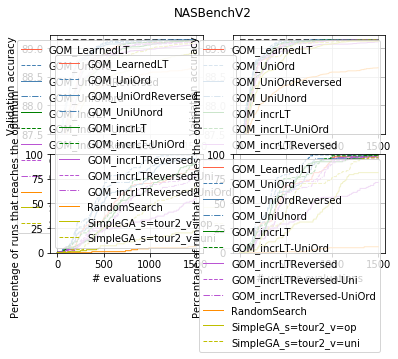

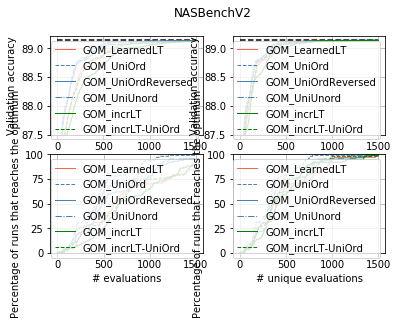

In [16]:
# Until 10000 absolute evaluations. Unique evaluations are also stored.
# Alphabet={0,1,2,3} (inlcuding identity layer).
filename = "../data/exp6/data_convergence_0123.json"

# Alphabet={0,1,2} (excluding identity layer).
# filename = "../data/exp6/data_convergence_012.json"

important = ["GOM_UniOrd", "GOM_UniOrdReversed", "GOM_UniUnord", 
             "GOM_LearnedLT", "GOM_incrLT", "GOM_incrLT-UniOrd"]

for importantOnly in [False, True]:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    firstplots = [ax1, ax2]
    secondplots = [ax3, ax4]
    cm = plt.cm.Set1.colors
    cycle = (cycler(color=cm) * cycler(linestyle=['-', '--']))
    for ax in [ax1,ax2,ax3,ax4]:
        ax.set_prop_cycle(cycle)

    numEvaluations = 1500;
    optimum = 89.13

    with open(filename) as json_file:
        rawdata = json.load(json_file)
        repetitions = rawdata["repetitions"]
        print("averages of", repetitions, "repetitions")

        fig.suptitle(rawdata['fitnessFunction'])
        algorithms = rawdata['experiments']
        totalBest = 0;

        for k, evaluationstype in enumerate(["absolute", "unique"]):

            for algo in algorithms:
                if(importantOnly and algo not in important):
                    continue
                data = algorithms[algo]["7"]
                numEntries = len(data)

                accuracies = np.zeros((numEntries, numEvaluations))
                optfound = np.zeros((numEntries, numEvaluations))

                for i, rep in enumerate(data):

                    convergenceValues = data[rep]["convergence"][evaluationstype]
                    fillUntil = min(len(convergenceValues), numEvaluations)

                    accuracies[i, 0:fillUntil] = convergenceValues[0:fillUntil]
                    if(fillUntil < numEvaluations):
                        accuracies[i, fillUntil:numEvaluations] = accuracies[i, fillUntil-1]

                    for j, value in enumerate(accuracies[i,:]):
                        if (value >= optimum):
                            optfound[i][j] = 1

                avgAccuracies = np.mean(accuracies, 0)
                stdAccuracies = np.std(accuracies, 0)

                totalOptfound = np.sum(optfound, 0) / repetitions * 100
                totalBest = max(totalBest, max(avgAccuracies))

                firstplots[k].plot(range(numEvaluations), avgAccuracies, label=algo, color=colorDict[algo][0], linestyle=colorDict[algo][1], linewidth=1)
#                 firstplots[k].fill_between(range(numEvaluations), avgAccuracies-stdAccuracies, avgAccuracies+stdAccuracies, alpha=0.1)

                secondplots[k].plot(range(numEvaluations), totalOptfound, label=algo, color=colorDict[algo][0], linestyle=colorDict[algo][1], linewidth=1)

            ax = firstplots[k]
            ax.set_ylim(87.5, optimum * 1.001)
            ax.legend()
            ax.set_xlabel('# evaluations')
            ax.set_ylabel('Validation accuracy')
            ax.hlines(89.14, 0, numEvaluations, linestyles='dashed')
        #     ax.set_xscale('log')
        #     ax.set_yscale('log')
            ax.grid()

            ax = secondplots[k]
            ax.set_ylim(0,100)
            ax.legend()
            ax.set_xlabel('# evaluations')
            ax.set_ylabel('Percentage of runs that reaches the optimum')
            ax.grid()

    ax2.set_xlabel("# unique evaluations")
    ax4.set_xlabel("# unique evaluations")


# Experiment 6.2:  ARK-1 - Scalability

averages of 100 repetitions
averages of 100 repetitions


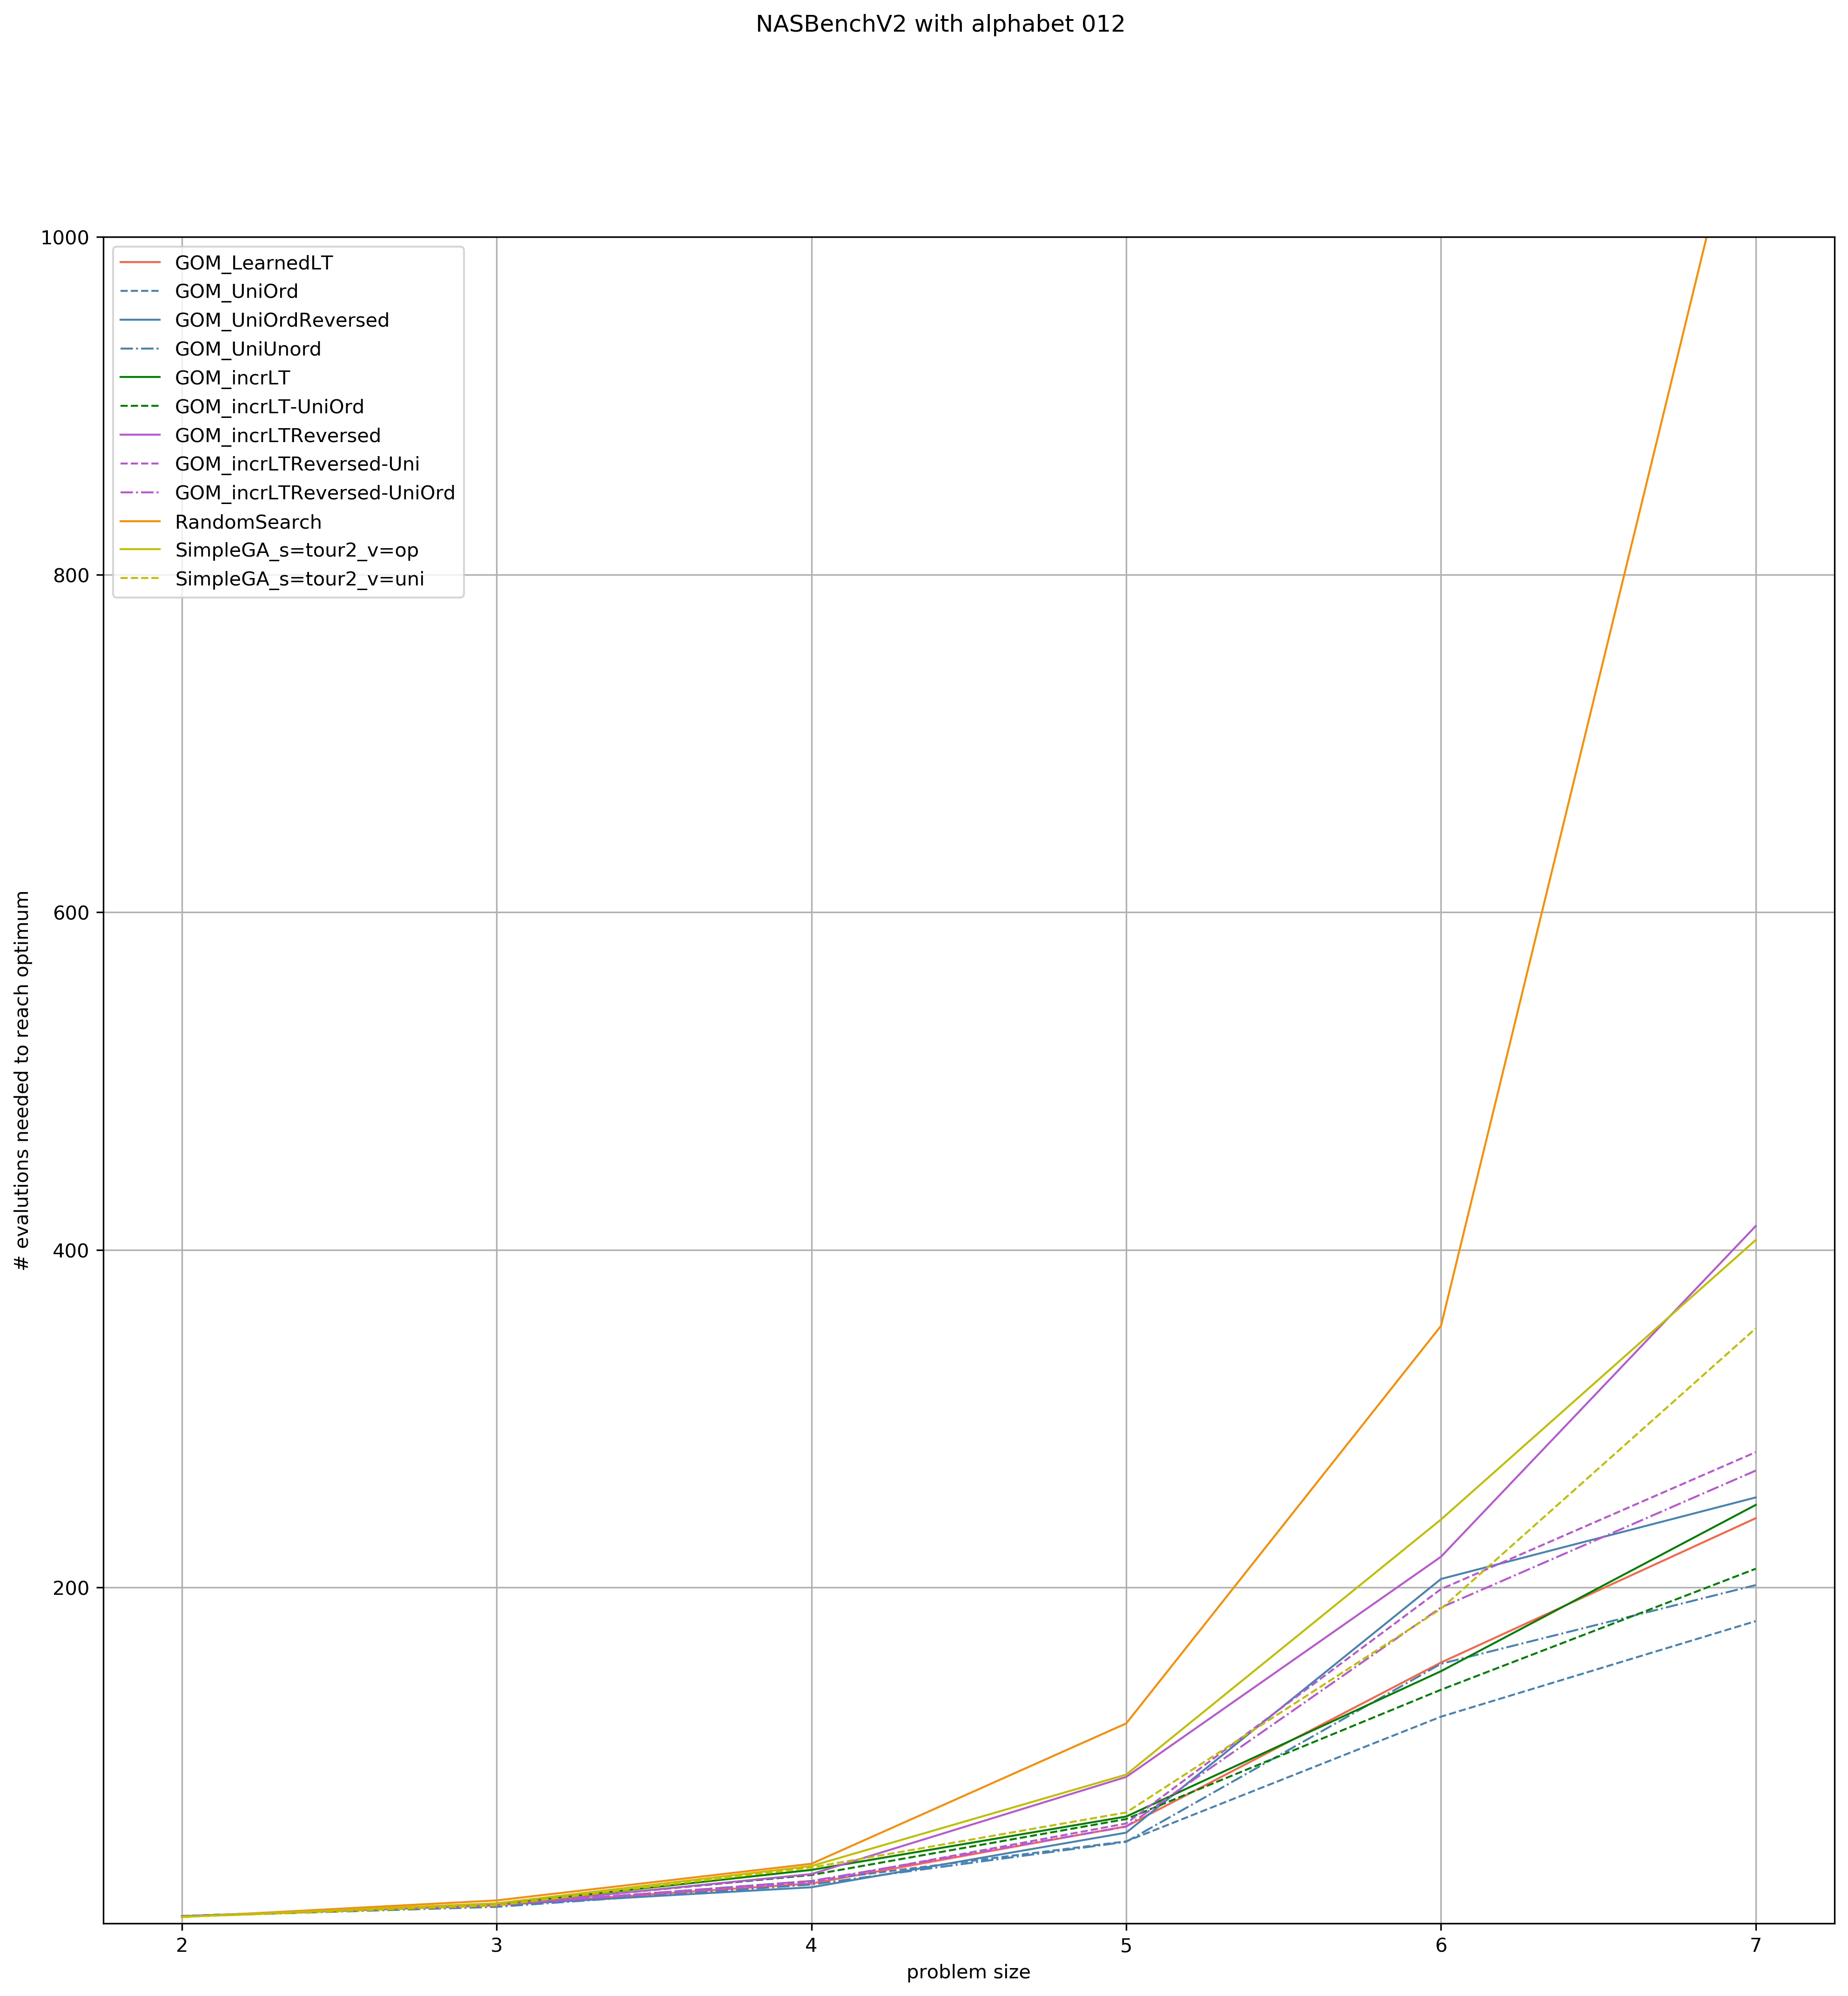

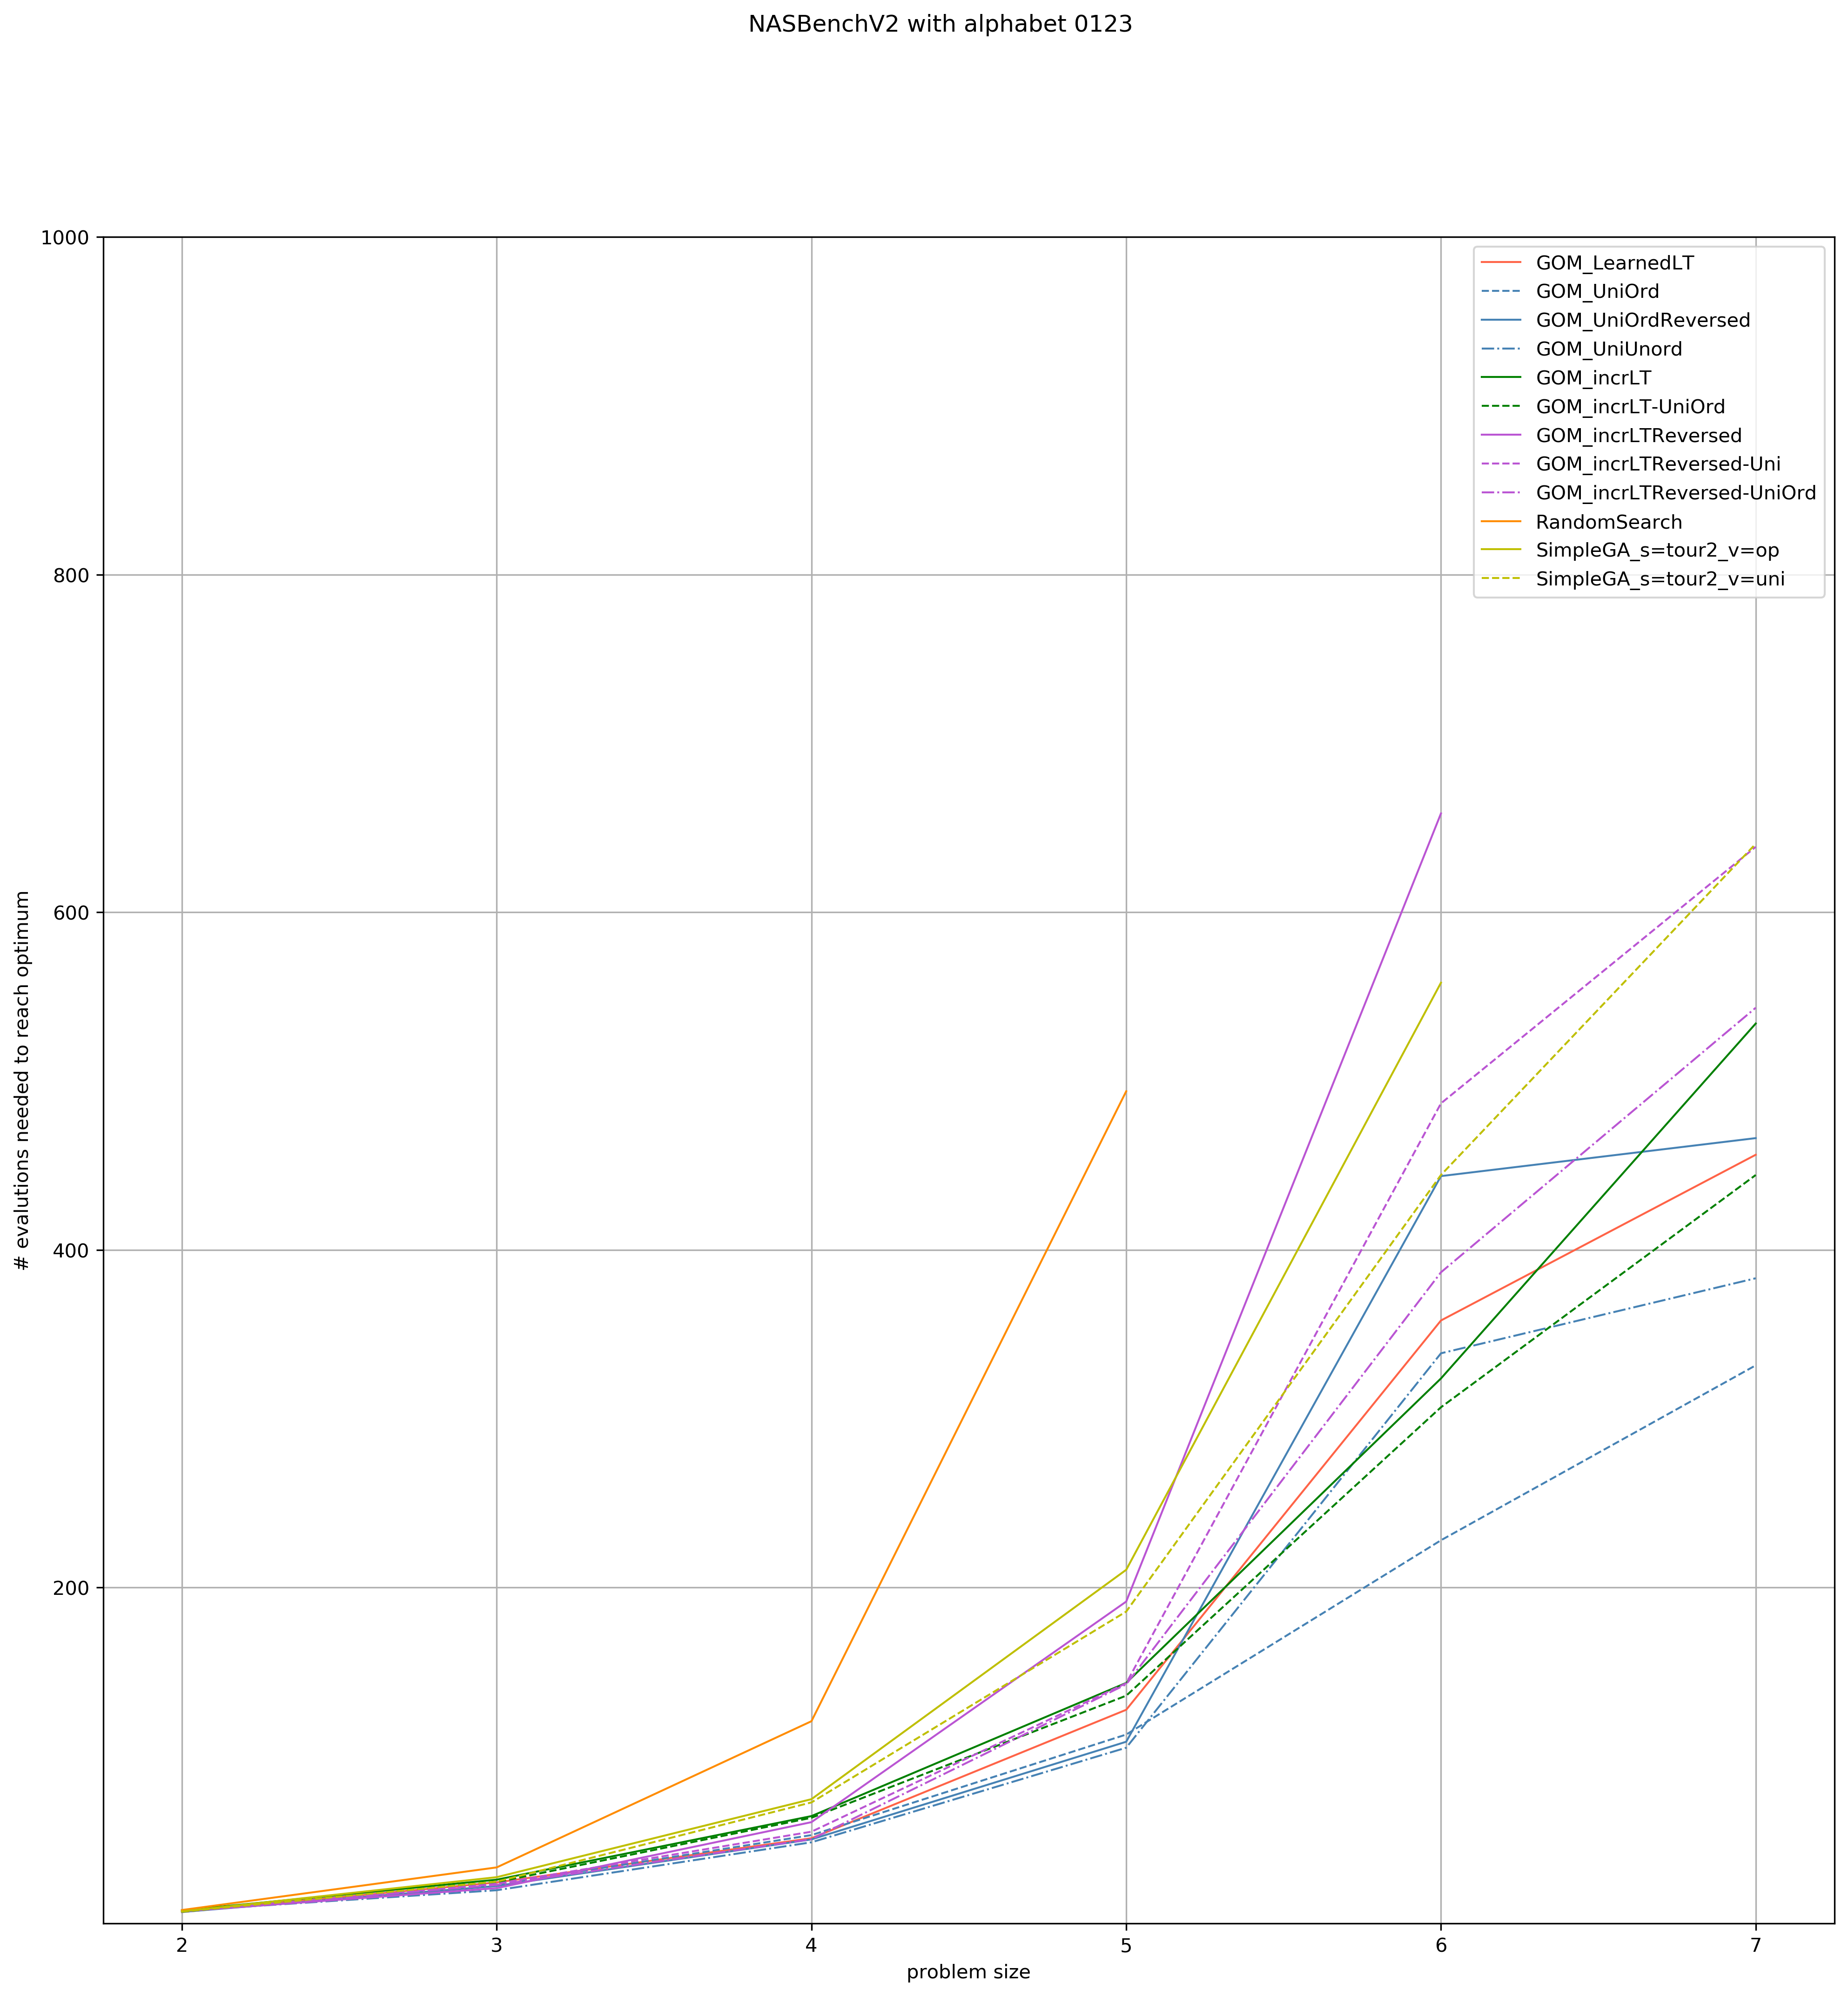

In [48]:
alphabet1 = "012"
alphabet2 = "0123"

for alphabet in [alphabet1, alphabet2]:
    fig, (ax1) = plt.subplots(1, 1)
    cm = plt.cm.Set1.colors
    cycle = (cycler(color=cm) * cycler(linestyle=['-', '--']))
    ax1.set_prop_cycle(cycle)
    ax2.set_prop_cycle(cycle)

    selection = ["GOM_LearnedLT", "GOM_UniOrd", "GOM_UniUnord", "GOM_UniOrdReversed"]

    filename = "../data/exp6/data_scaling_" + alphabet + "/data_combined.json"
    
    with open(filename) as json_file:
        rawdata = json.load(json_file)

        fig.suptitle(rawdata['fitnessFunction'] + " with alphabet " + alphabet)
        algorithms = rawdata['experiments']

        repetitions = rawdata['repetitions']

        numAlgos = len(algorithms)

    #     for algo in selection:
        for algo in algorithms:

            data = algorithms[algo]
            numEntries = len(data)

            Evaluations = np.zeros((numEntries, repetitions))
            Times = np.zeros((numEntries, repetitions))

            for i, problemsize in enumerate(data):

                for j, rep in enumerate(data[problemsize]):

                    Evaluations[i][j] = data[problemsize][rep]["uniqueEvaluations"]
                    Times[i][j] = data[problemsize][rep]["timeTaken"]

            avgEvaluations = np.mean(Evaluations, 1);
            stdEvaluations = np.std(Evaluations, 1);
            avgTimes = np.mean(Times, 1);
            stdTimes = np.std(Times, 1)

            xrange = range(2,numEntries+2)

            ax1.plot(xrange, avgEvaluations, label=algo, color=colorDict[algo][0], linestyle=colorDict[algo][1], linewidth=1)
    #         ax1.fill_between(xrange, avgEvaluations-stdEvaluations, avgEvaluations+stdEvaluations, alpha=0.1)
    #         ax1.errorbar(xrange, avgEvaluations, yerr=stdEvaluations)

    #         ax2.plot(xrange, avgTimes, label=algo)
    #         ax2.fill_between(xrange, avgTimes-stdTimes, avgTimes+stdTimes, alpha=0.1)

        ax1.set_ylim(1,1000)
        ax1.legend()
        ax1.set_xlabel('problem size')
        ax1.set_ylabel('# evalutions needed to reach optimum')
        ax1.grid()
#         ax1.set_yscale('log')
        
    
        print("averages of", repetitions, "repetitions")

# Experiment 8.1: ARK-2 - Convergence

averages of 100 repetitions
averages of 100 repetitions


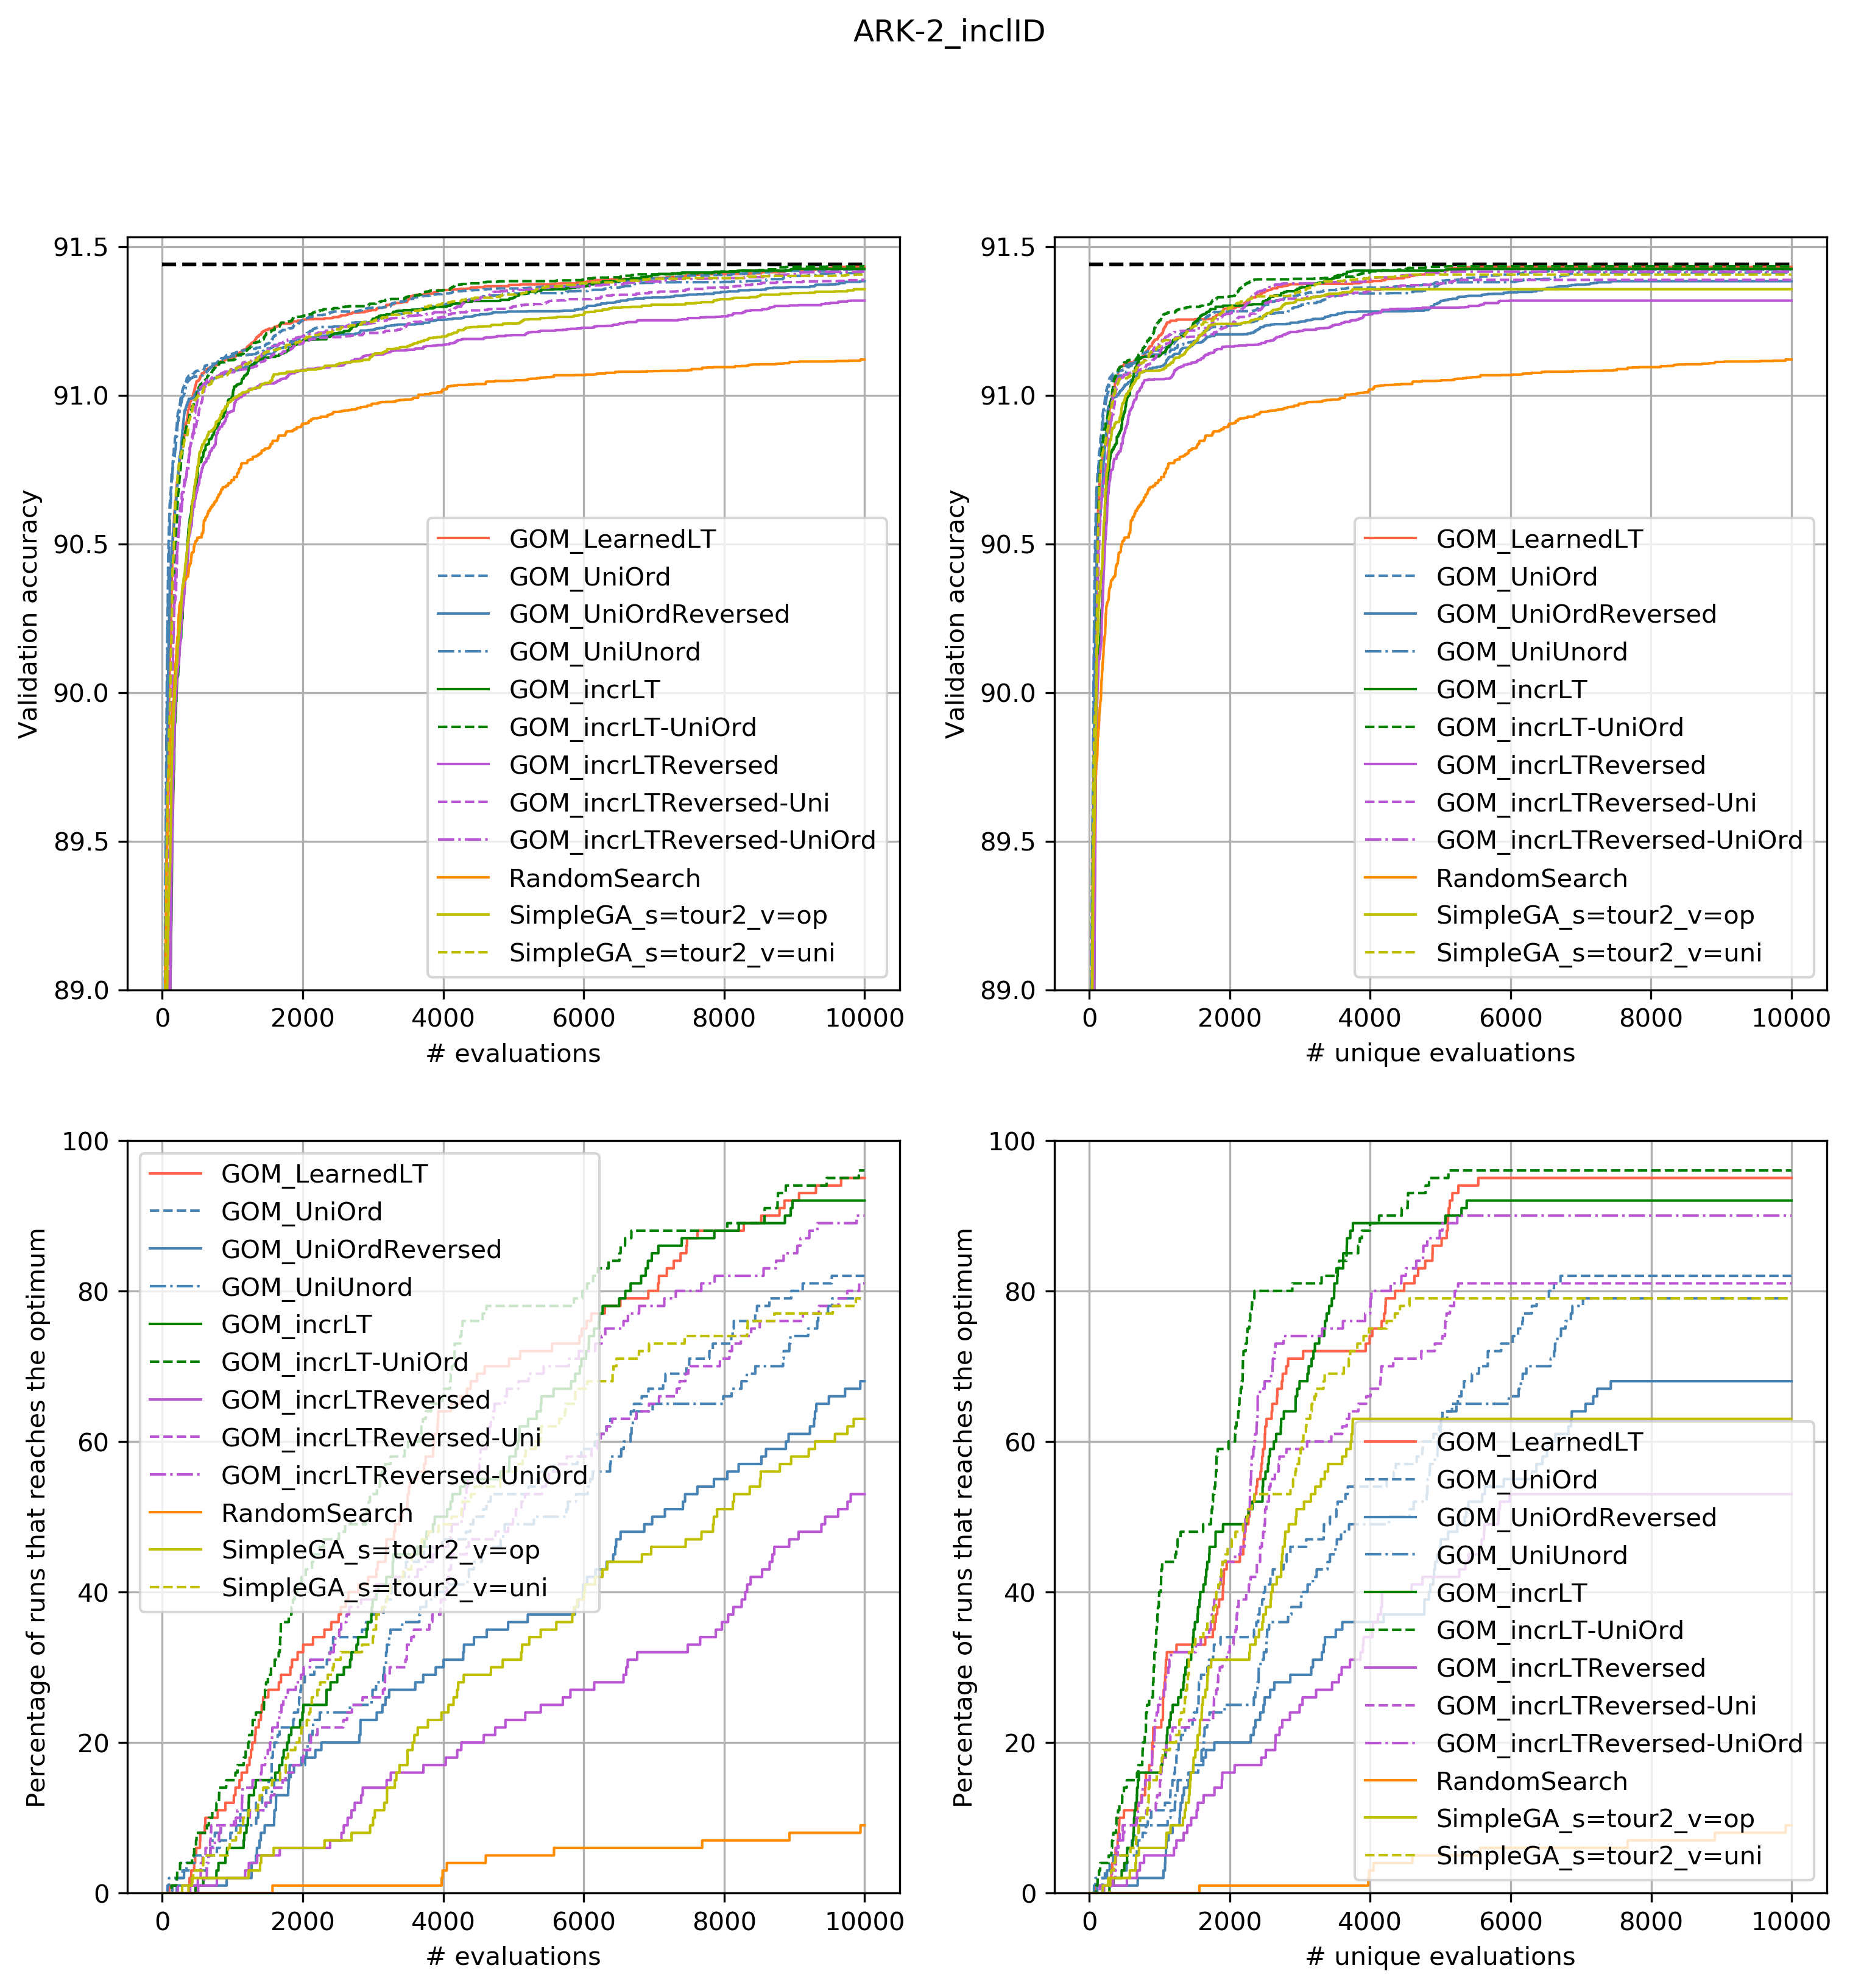

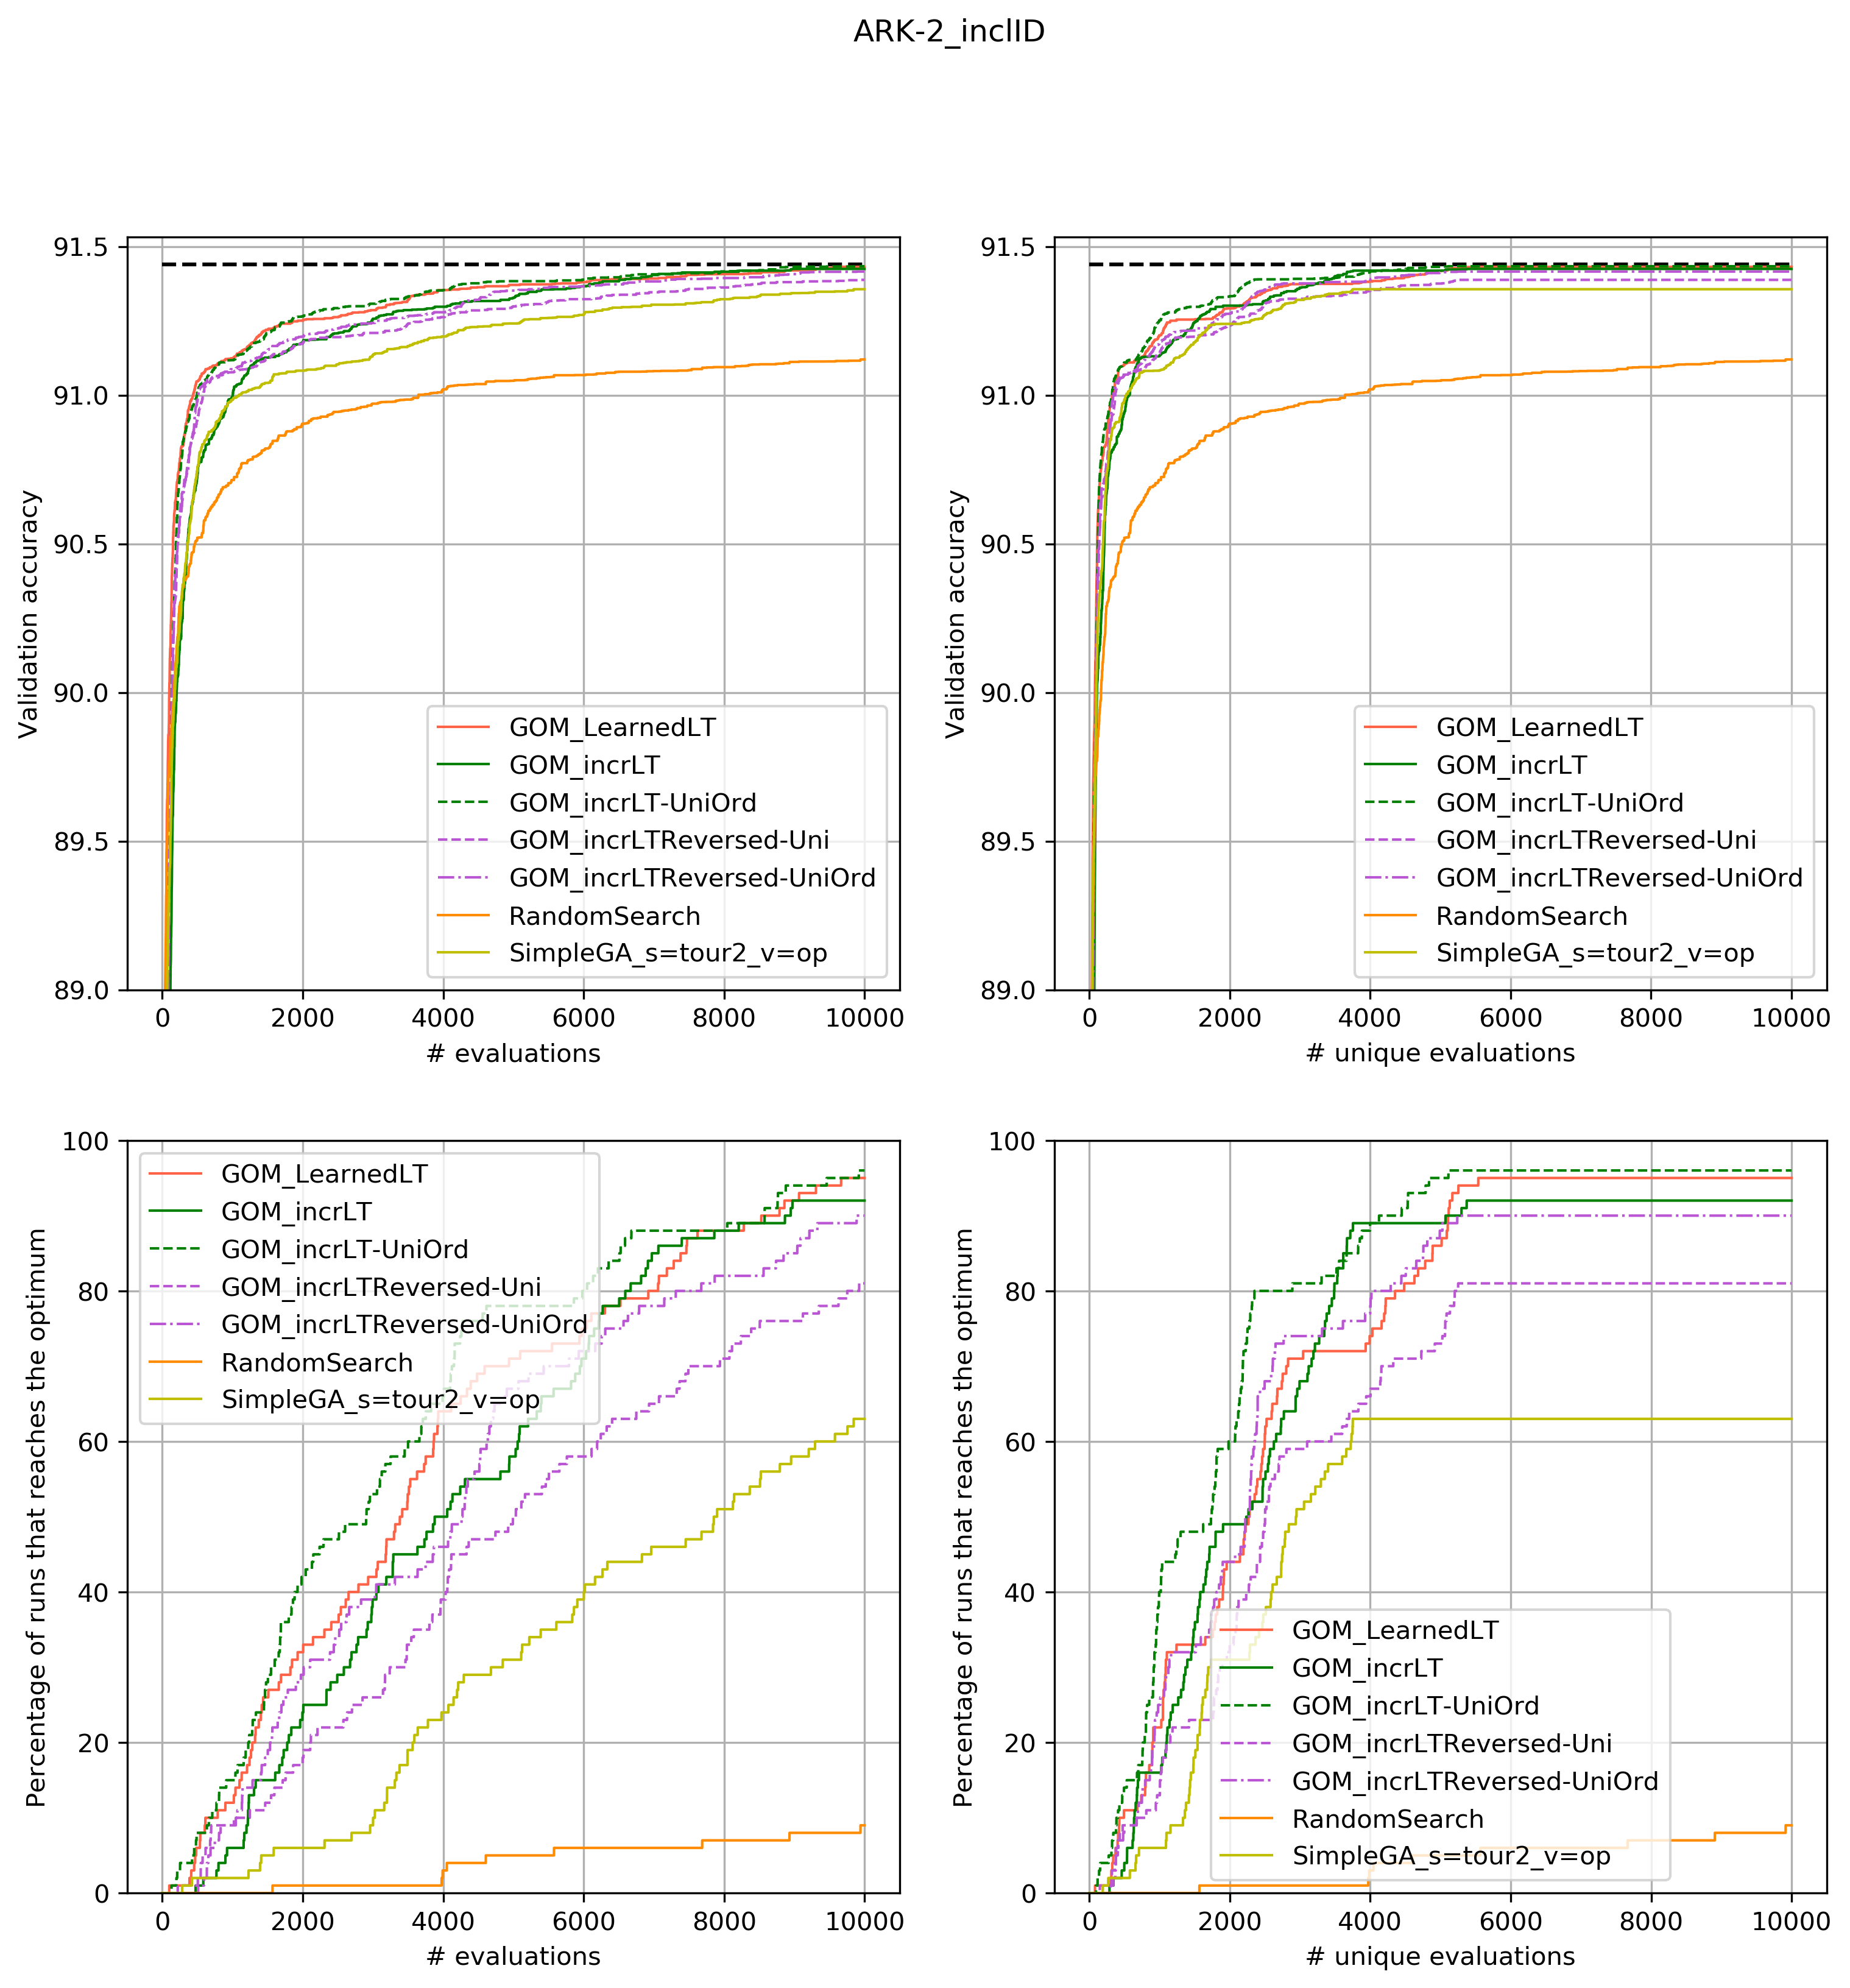

In [648]:
# Until 10000 absolute evaluations. Unique evaluations are also stored.

# Alphabet={0,1,2}. (so identity is included)
filename = "../data/exp8/data_convergence_012.json"

# Alphabet={0,1}. (so identity is excluded)
# filename = "../data/exp8/data_convergence_01.json"

important = ["GOM_incrLT-UniOrd", "GOM_incrLTReversed-UniOrd", "GOM_LearnedLT", 
             "GOM_incrLT", "SimpleGA_s=tour2_v=op", "GOM_incrLTReversed-Uni",
            "RandomSearch", "LocalSearch-rand"]

for importantOnly in [False, True]:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    firstplots = [ax1, ax2]
    secondplots = [ax3, ax4]
    cm = plt.cm.Set1.colors
#     cycle = (cycler(color=cm) * cycler(linestyle=['-', '--']))
#     for ax in [ax1,ax2,ax3,ax4]:
#         ax.set_prop_cycle(cycle)

    numEvaluations = 10000;
    optimum = 91.44

    with open(filename) as json_file:
        rawdata = json.load(json_file)
        repetitions = rawdata["repetitions"]
        print("averages of", repetitions, "repetitions")

        fig.suptitle(rawdata['fitnessFunction'])
        algorithms = rawdata['experiments']
        totalBest = 0;

        for k, evaluationstype in enumerate(["absolute", "unique"]):

            for algo in algorithms:
                if(importantOnly and algo not in important):
                    continue
                data = algorithms[algo]["13"]
                numEntries = len(data)

                accuracies = np.zeros((numEntries, numEvaluations))
                optfound = np.zeros((numEntries, numEvaluations))

                for i, rep in enumerate(data):

                    convergenceValues = data[rep]["convergence"][evaluationstype]
                    fillUntil = min(len(convergenceValues), numEvaluations)

                    accuracies[i, 0:fillUntil] = convergenceValues[0:fillUntil]
                    if(fillUntil < numEvaluations):
                        accuracies[i, fillUntil:numEvaluations] = accuracies[i, fillUntil-1]

                    for j, value in enumerate(accuracies[i,:]):
                        if (value >= optimum):
                            optfound[i][j] = 1

                avgAccuracies = np.mean(accuracies, 0)
                stdAccuracies = np.std(accuracies, 0)

                totalOptfound = np.sum(optfound, 0) / repetitions * 100
                totalBest = max(totalBest, max(avgAccuracies))

                firstplots[k].plot(range(numEvaluations), avgAccuracies, label=algo, color=colorDict[algo][0], linestyle=colorDict[algo][1], linewidth=1)
#                 firstplots[k].fill_between(range(numEvaluations), avgAccuracies-stdAccuracies, avgAccuracies+stdAccuracies, alpha=0.1)

                secondplots[k].plot(range(numEvaluations), totalOptfound, label=algo, color=colorDict[algo][0], linestyle=colorDict[algo][1], linewidth=1)

            ax = firstplots[k]
            ax.set_ylim(89, optimum * 1.001)
            ax.legend()
            ax.set_xlabel('# evaluations')
            ax.set_ylabel('Validation accuracy')
            ax.hlines(optimum, 0, numEvaluations, linestyles='dashed')
        #     ax.set_xscale('log')
        #     ax.set_yscale('log')
            ax.grid()

            ax = secondplots[k]
            ax.set_ylim(0,100)
            ax.legend()
            ax.set_xlabel('# evaluations')
            ax.set_ylabel('Percentage of runs that reaches the optimum')
            ax.grid()

    ax2.set_xlabel("# unique evaluations")
    ax4.set_xlabel("# unique evaluations")


# Functions for scalability plots

In [5]:
def scalabilityBarplot(barX, barY, colors):
    fig, (ax) = plt.subplots(1, 1, figsize=(10,3))
    sortingArray = np.argsort(barY)
    labels = np.array(barX)[sortingArray]
    bars = ax.bar(labels, np.array(barY)[sortingArray], capsize=3, tick_label=labels)
    minY = min(barY)
    maxY = max(barY)
    ax.set_ylim(minY * 0.9,maxY * 1.1)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yscale('log')
    ax.grid(axis='y')
    ax.set_ylabel('# unique evalutions needed to reach optimum')
    for i, bar in enumerate(bars):
        bar.set_color(colors[sortingArray[i]])
    return ax

In [173]:
def scalabilityPlot (alphabets, begin, end, 
                     fileprepend, fileappend, evaluationstype="uniqueEvaluations", 
                     adaptedMinY=False, figuresize=(10,10), drawScalabilityBarPlot=True, 
                     dontDisplayThese=[], barPlot=10, alsoPlotPopulationSize=False,
                    popSizeKey="popsizereached"):
    
    minY = 10000000;
    maxY = 0;
    barX = []
    barY = []
    barYstd = []
    colors = []
    populationSizes = [];

    for alphabet in alphabets: #, alphabet2]:
        fig, (ax1) = plt.subplots(1, 1, figsize=figuresize)
        if alsoPlotPopulationSize: fig2, (ax2) = plt.subplots(1, 1, figsize=figuresize)

        filename = "" + fileprepend + alphabet + fileappend

        with open(filename) as json_file:
            rawdata = json.load(json_file)

            fig.suptitle(rawdata['fitnessFunction'] + " with alphabet " + alphabet)
            algorithms = rawdata['experiments']

            repetitions = rawdata['repetitions']

            numAlgos = len(algorithms)

        #     for algo in selection:
            for algo in algorithms:
                
                if algo in dontDisplayThese:
                    continue

                data = algorithms[algo]
                availableProblemSizes = [int(i) for i in list(data.keys())]
                
                thisBegin = max(begin, min(availableProblemSizes))
                thisEnd = min(end, max(availableProblemSizes))
                if(thisEnd < thisBegin):
                    continue
                
                numEntries = thisEnd - thisBegin + 1

                Evaluations = np.zeros((numEntries, repetitions))
                populationSizes = np.zeros((numEntries, repetitions))

                for i, problemsize in enumerate(range(thisBegin, thisEnd+1)):
                    for j, rep in enumerate(data[str(problemsize)]):
                        Evaluations[i][j] = data[str(problemsize)][rep][evaluationstype]
                        if alsoPlotPopulationSize: populationSizes[i][j] = data[str(problemsize)][rep][popSizeKey]

                avgEvaluations = np.mean(Evaluations, 1);
                stdEvaluations = np.std(Evaluations, 1);
                minY = min(minY, min(avgEvaluations))
                maxY = max(maxY, max(avgEvaluations))
                
                if alsoPlotPopulationSize: avgPopulationSizes = np.mean(populationSizes, 1);

                xrange = range(thisBegin, thisEnd+1)

#                 print(list(xrange))
                if drawScalabilityBarPlot and barPlot in list(xrange):
                    idx = list(xrange).index(barPlot)
#                     print(index)
                    barX.append(algo)
                    barY.append(avgEvaluations[idx])
                    barYstd.append(stdEvaluations[idx])
                    colors.append(colorDict[algo][0])
                
                ax1.plot(xrange, avgEvaluations, label=algo, color=colorDict[algo][0], linestyle=colorDict[algo][1], 
                         linewidth=1, marker=colorDict[algo][2])
#                 ax1.fill_between(xrange, avgEvaluations-stdEvaluations, avgEvaluations+stdEvaluations, alpha=0.1)
#                 ax1.errorbar(xrange, avgEvaluations, yerr=stdEvaluations)

                if alsoPlotPopulationSize: ax2.plot(xrange, avgPopulationSizes, label=algo, color=colorDict[algo][0], 
                                                    linestyle=colorDict[algo][1], linewidth=1, marker=colorDict[algo][2])

            if not adaptedMinY:
                minY = 1
            else:
                minY = minY * 0.9
                
            ax1.set_ylim(minY, maxY * 1.2)
            ax1.legend()
            ax1.set_xlabel('problem size')
            ax1.set_ylabel('# ' + evaluationstype + ' needed to reach optimum')
            ax1.grid()
            ax1.set_yscale('log')
            
            if alsoPlotPopulationSize:
                ax2.legend()
                ax2.set_xlabel('problem size')
                ax2.set_ylabel('Population size that achieves optimal solution')
                ax2.grid()
                ax2.set_yscale('log')

            if drawScalabilityBarPlot:
                ax3 = scalabilityBarplot(barX, barY, colors)
                ax3.set_xlabel("Algorithms on problemsize 12")

            print("averages of", repetitions, "repetitions")

# Functions for convergence plots

In [146]:
def convergencePlot (filename, numEvaluations=10000, dontDisplayThese=[], 
                     evaluationsType="unique", figuresizeplot1=(10,10), 
                     figuresizeplot2=(10,5),
                     ymin=0.98, ymax=1.01, absYmax=-1,
                     xlog=False, ylog=False, epsilon=[0],
                    plotFirst=True):

    if plotFirst: fig1, ax1 = plt.subplots(1, 1, figsize=figuresizeplot1)
    epsAxes = []
    for i in range(len(epsilon)):
        fig, ax = plt.subplots(1, 1, figsize=figuresizeplot2)
        epsAxes.append(ax)

    with open(filename) as json_file:
        rawdata = json.load(json_file)
        repetitions = rawdata["repetitions"]
        print("averages of", repetitions, "repetitions")

        if plotFirst: fig1.suptitle(rawdata['fitnessFunction'])
        algorithms = rawdata['experiments']
        optimum = rawdata['optimum']
        totalBest = 0;
        
        maxEvaluations = rawdata['maxEvaluations']
        if(maxEvaluations > 0):
            numEvaluations = min(numEvaluations, maxEvaluations)

        for algo in algorithms:
            if algo in dontDisplayThese:
                continue
            data = algorithms[algo]
            data = data[list(data.keys())[0]]
            numEntries = len(data)
            
            accuracies = np.zeros((numEntries, numEvaluations))
            optfound = np.zeros((numEntries, numEvaluations, len(epsilon)))

            for i, rep in enumerate(data):

                convergenceValues = data[rep]["convergence"][evaluationsType]
                fillUntil = min(len(convergenceValues), numEvaluations)

                accuracies[i, 0:fillUntil] = convergenceValues[0:fillUntil]
                if(fillUntil < numEvaluations):
                    accuracies[i, fillUntil:numEvaluations] = accuracies[i, fillUntil-1]

                for j, value in enumerate(accuracies[i,:]):
                    for k, eps in enumerate(epsilon):
                        if (value >= optimum - eps):
                            optfound[i][j][k] = 1

            avgAccuracies = optimum - np.mean(accuracies, 0)
            stdAccuracies = np.std(accuracies, 0)

            totalOptfound = np.sum(optfound, 0) / repetitions * 100
            totalBest = max(totalBest, max(avgAccuracies))

            if plotFirst: ax1.plot(range(numEvaluations), avgAccuracies, label=algo, 
                                   color=colorDict[algo][0], linestyle=colorDict[algo][1], 
                                   linewidth=1)

            for j, ax in enumerate(epsAxes):
                ax.plot(range(numEvaluations), totalOptfound[:,j], label=algo, 
                        color=colorDict[algo][0], linestyle=colorDict[algo][1], linewidth=1)

        if plotFirst:
    #         if absYmax > 0:
    #             ax1.set_ylim(optimum * ymin, absYmax)
    #         else:
    #             ax1.set_ylim(optimum * ymin, optimum * ymax)
            ax1.legend()
            ax1.set_xlabel('# ' + evaluationsType + ' evaluations')
            ax1.set_ylabel('Optimum(=' + str(optimum) + ') - Validation accuracy')
    #         ax1.hlines(0, 0, numEvaluations, color="red", linestyles='solid')
#             ax1.hlines(epsilon, 0, numEvaluations, color="red", linestyles='dashed', linewidth=0.5)
            if xlog: ax1.set_xscale('log')
            if ylog: ax1.set_yscale('log')
            ax1.grid()

        for i, ax2 in enumerate(epsAxes):
            ax1.hlines(epsilon[i], 0, numEvaluations, color="red", linestyle='dashed', linewidth=0.5)
            ax1.text(0.8 * numEvaluations, epsilon[i], '$\epsilon$ = ' + str(epsilon[i]))
            ax2.set_ylim(0,101)
            ax2.legend()
            ax2.set_xlabel('# ' + evaluationsType + ' evaluations')
            ax2.set_ylabel('Percentage of runs that reaches the optimum')
            ax2.set_title('Algorithms reaching (optimum - $\epsilon$(=' + str(epsilon[i]) + '))')
            ax2.grid()
            ax2.set_xscale('log')



# Experiment 8.2: ARK-2 - Scalability

averages of 100 repetitions


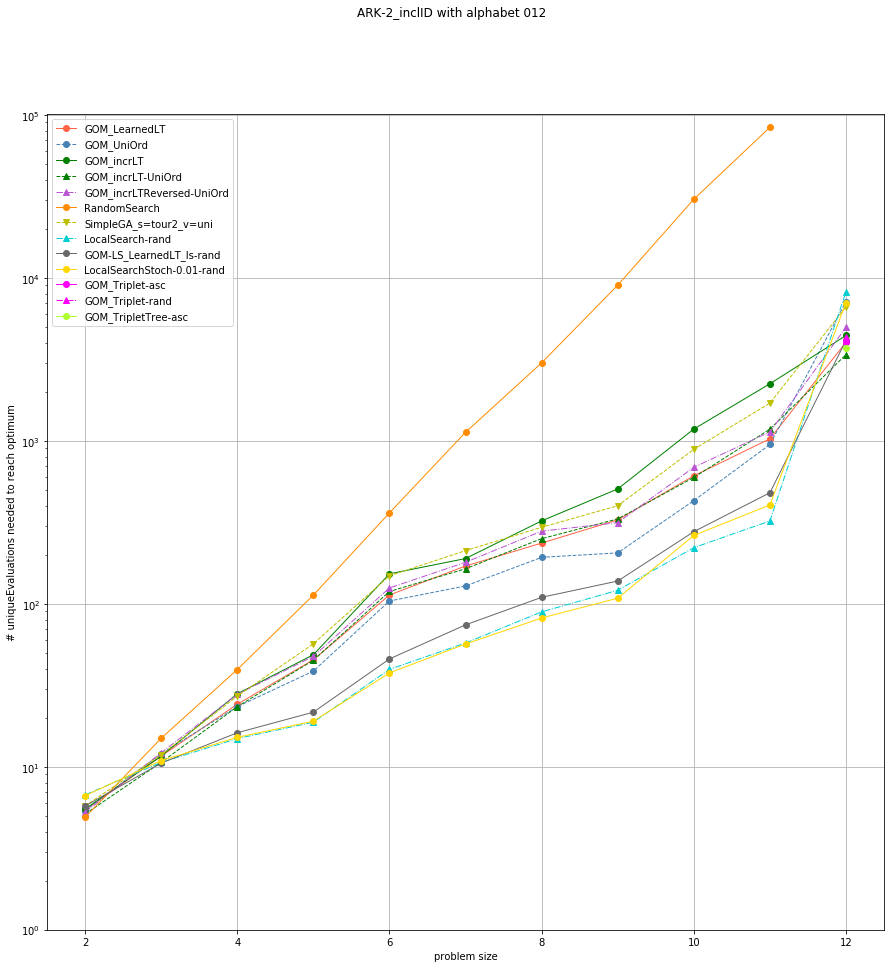

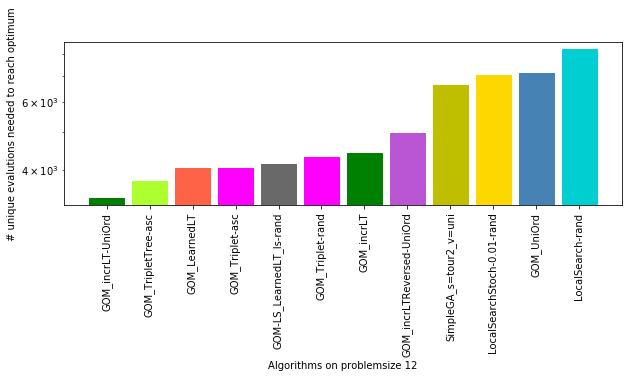

In [22]:
scalabilityPlot(["012"], 2, 13, 
                "../data/exp8/data_scaling_", 
                "/data_scaling__combined.json",
                drawScalabilityBarPlot=True, 
                dontDisplayThese=["GOM_incrLTReversed", "GOM_Triplet-desc", "SimpleGA_s=tour2_v=op",
                                 "GOM_UniOrdReversed", "GOM_UniUnord", "GOM_TripletTree-desc",
                                 "GOM_TripletTree-rand", "GOM_incrLTReversed-Uni", "LocalSearchStoch-0.2-rand", 
                                 "LocalSearchStoch-0.1-rand", "LocalSearchStoch-0.05-rand", 
                                  "GOM-LS_incrLT-UniOrd_ls-rand"],
               figuresize=(15,15))

### Sanity check for dip in scalability graph on ARK-2
Actually, we found out the cause of the dip. Regarding 12-layered NN's, there is 1 solution among the 5M solutions that has the optimum value of 91.44. Regarding 13-layered NN's, there are 14 solutions out of 1.5M that have the optimum of 91.44. This increase in optimal solutions makes the problem slightly easier to solve.

In [85]:
for x in ["12", "13"]:
    print("Displaying info for genotype length " + x)
    with open("../data/exp8/data_scaling_012/data_scaling_" + x + ".json") as json_file:
        data = json.load(json_file)
        total = 0
        data = data["experiments"]
        for algo in data:
            for item in data[algo][x]:
                total = total + data[algo][x][item]["uniqueEvaluations"]
            print(algo, total / 100)
        print()

Displaying info for genotype length 12
GOM_LearnedLT 4027.61
GOM_UniOrd 11176.13
GOM_UniUnord 20283.14
GOM_incrLT 24714.22
GOM_incrLT-UniOrd 28023.64
GOM_incrLTReversed-Uni 33245.62
GOM_incrLTReversed-UniOrd 38222.69

Displaying info for genotype length 13
GOM_LearnedLT 2848.1
GOM_UniOrd 7127.29
GOM_UniUnord 11798.45
GOM_incrLT 14370.35
GOM_incrLT-UniOrd 16681.8
GOM_incrLTReversed-Uni 19648.67
GOM_incrLTReversed-UniOrd 22320.37



## Significance tests for the scalability plot of ARK-2

In [318]:
def createDictionary(problemsize):
    dictionary = {};
    with open("../data/exp8/data_scaling_012/data_scaling__combined.json") as json_file:
        data = json.load(json_file)
        data = data["experiments"]
        for algo in data:
            values = []
            for i, item in enumerate(data[algo][problemsize]):
                values.append(data[algo][problemsize][item]["uniqueEvaluations"])
            dictionary[algo] = values

    return dictionary

dictionary = createDictionary("12")

In [310]:
for entry1 in dictionary:
    for entry2 in dictionary:
        if(entry1 == entry2):
            continue
        stat, p = mannwhitneyu(dictionary[entry1], dictionary[entry2], alternative='less')
        alpha = 0.05
        if p <= alpha and ("incrLT-UniOrd" in entry1):
            print("x =", entry1, "y =", entry2)
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            print('Different distribution (reject H0)')
            print()
#         else:
#             print('Same distribution (fail to reject H0)')

x = GOM_incrLT-UniOrd y = GOM_LearnedLT
Statistics=3814.500, p=0.002
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = GOM_UniOrd
Statistics=2229.500, p=0.000
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = GOM_UniUnord
Statistics=2016.000, p=0.000
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = GOM_incrLT
Statistics=4197.000, p=0.025
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = GOM_incrLTReversed-Uni
Statistics=3252.500, p=0.000
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = GOM_incrLTReversed-UniOrd
Statistics=3645.500, p=0.000
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = SimpleGA_s=tour2_v=uni
Statistics=2997.000, p=0.000
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = GOM_incrLTReversed
Statistics=1517.000, p=0.000
Different distribution (reject H0)

x = GOM_incrLT-UniOrd y = SimpleGA_s=tour2_v=op
Statistics=2401.000, p=0.000
Different distribution (reject H0)

x = GOM_incrLT-UniO

In [586]:
def generateLatexTable(dictionary, withCorrection):
    count_gom_algorithms = 0
    count_other_algorithms = 0
    for entry in dictionary:
        if "GOM" in entry:
            count_gom_algorithms += 1
        else:
            count_other_algorithms += 1

    total_algorithms = count_gom_algorithms + count_other_algorithms
    amount_of_comparisons = ((total_algorithms)**2 - total_algorithms) / 2
    table = "\\begin{tabular}{|c|l|"
    end_of_line_full = "\\\\\\hline\n"
    end_of_line_partly = "\\\\\\cline{2-" + str(2 + len(dictionary)) + "}\n"
    for i in range(len(dictionary) + 2):
        table += "c|"
    table += ("}\n\\hline\n & & \\multicolumn{" + str(count_gom_algorithms))
    table += ("}{c|}{GOM} & \\multicolumn{" + str(count_other_algorithms) + "}{c|}{other}")
    table += end_of_line_full
    table += " &"
    for entry in sorted(dictionary):
        entry_string = entry.replace("GOM_", "")
        entry_string = entry_string.replace("_s=tour2_v=", "-")
        table += (" & \\rotatebox{90}{" + entry_string + "}")

    table += end_of_line_full
    table += "\\multirow{" + str(count_gom_algorithms) + "}{*}{GOM} "

    alpha = 0.05
    
    for i, entry1 in enumerate(sorted(dictionary)):
        if(i == count_gom_algorithms):
            table += "\\multirow{" + str(count_other_algorithms) + "}{*}{other} "
        entry_string = entry1.replace("GOM_", "")
        entry_string = entry_string.replace("_s=tour2_v=", "-")
        table += "& "
        table += entry_string
        for entry2 in sorted(dictionary):
            if(entry1 == entry2):
                table += "& -"
            else:
                stat, p = mannwhitneyu(dictionary[entry1], dictionary[entry2], alternative='less')
                if(withCorrection):
                    p = min(p * amount_of_comparisons, 1.0)
                value = '%.3f' % p
                if p <= alpha:
                    table += "& \\textbf{\\textcolor{red}{"
                    table += value
                    table += "}}"
                else:
                    table += ("& " + value)
        table += " "
        if i == count_gom_algorithms - 1 or i == count_gom_algorithms + count_other_algorithms - 1:
            table += end_of_line_full
        else:
            table += end_of_line_partly

    table += "\\end{tabular}"
    print(table)

In [321]:
generateLatexTable(createDictionary("12"), True)

\begin{tabular}{|c|l|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
 & & \multicolumn{9}{c|}{GOM} & \multicolumn{4}{c|}{other}\\\hline
 & & \rotatebox{90}{LearnedLT} & \rotatebox{90}{UniOrd} & \rotatebox{90}{UniOrdReversed} & \rotatebox{90}{UniUnord} & \rotatebox{90}{incrLT} & \rotatebox{90}{incrLT-UniOrd} & \rotatebox{90}{incrLTReversed} & \rotatebox{90}{incrLTReversed-Uni} & \rotatebox{90}{incrLTReversed-UniOrd} & \rotatebox{90}{LocalSearch-rand} & \rotatebox{90}{RandomSearch} & \rotatebox{90}{SimpleGA-op} & \rotatebox{90}{SimpleGA-uni}\\\hline
\multirow{9}{*}{GOM} & LearnedLT& -& \textbf{\textcolor{red}{0.000}}& \textbf{\textcolor{red}{0.000}}& \textbf{\textcolor{red}{0.000}}& 1.000& 1.000& \textbf{\textcolor{red}{0.000}}& 1.000& 1.000& \textbf{\textcolor{red}{0.000}}& \textbf{\textcolor{red}{0.000}}& \textbf{\textcolor{red}{0.000}}& \textbf{\textcolor{red}{0.046}} \\\cline{2-15}
& UniOrd& 1.000& -& \textbf{\textcolor{red}{0.000}}& 1.000& 1.000& 1.000& \textbf{\textcolor{red}{0.000}}& 1.000

---------
# Experiment 9.1: All algorithms on ARK-3 (Scalability Plots)

averages of 100 repetitions


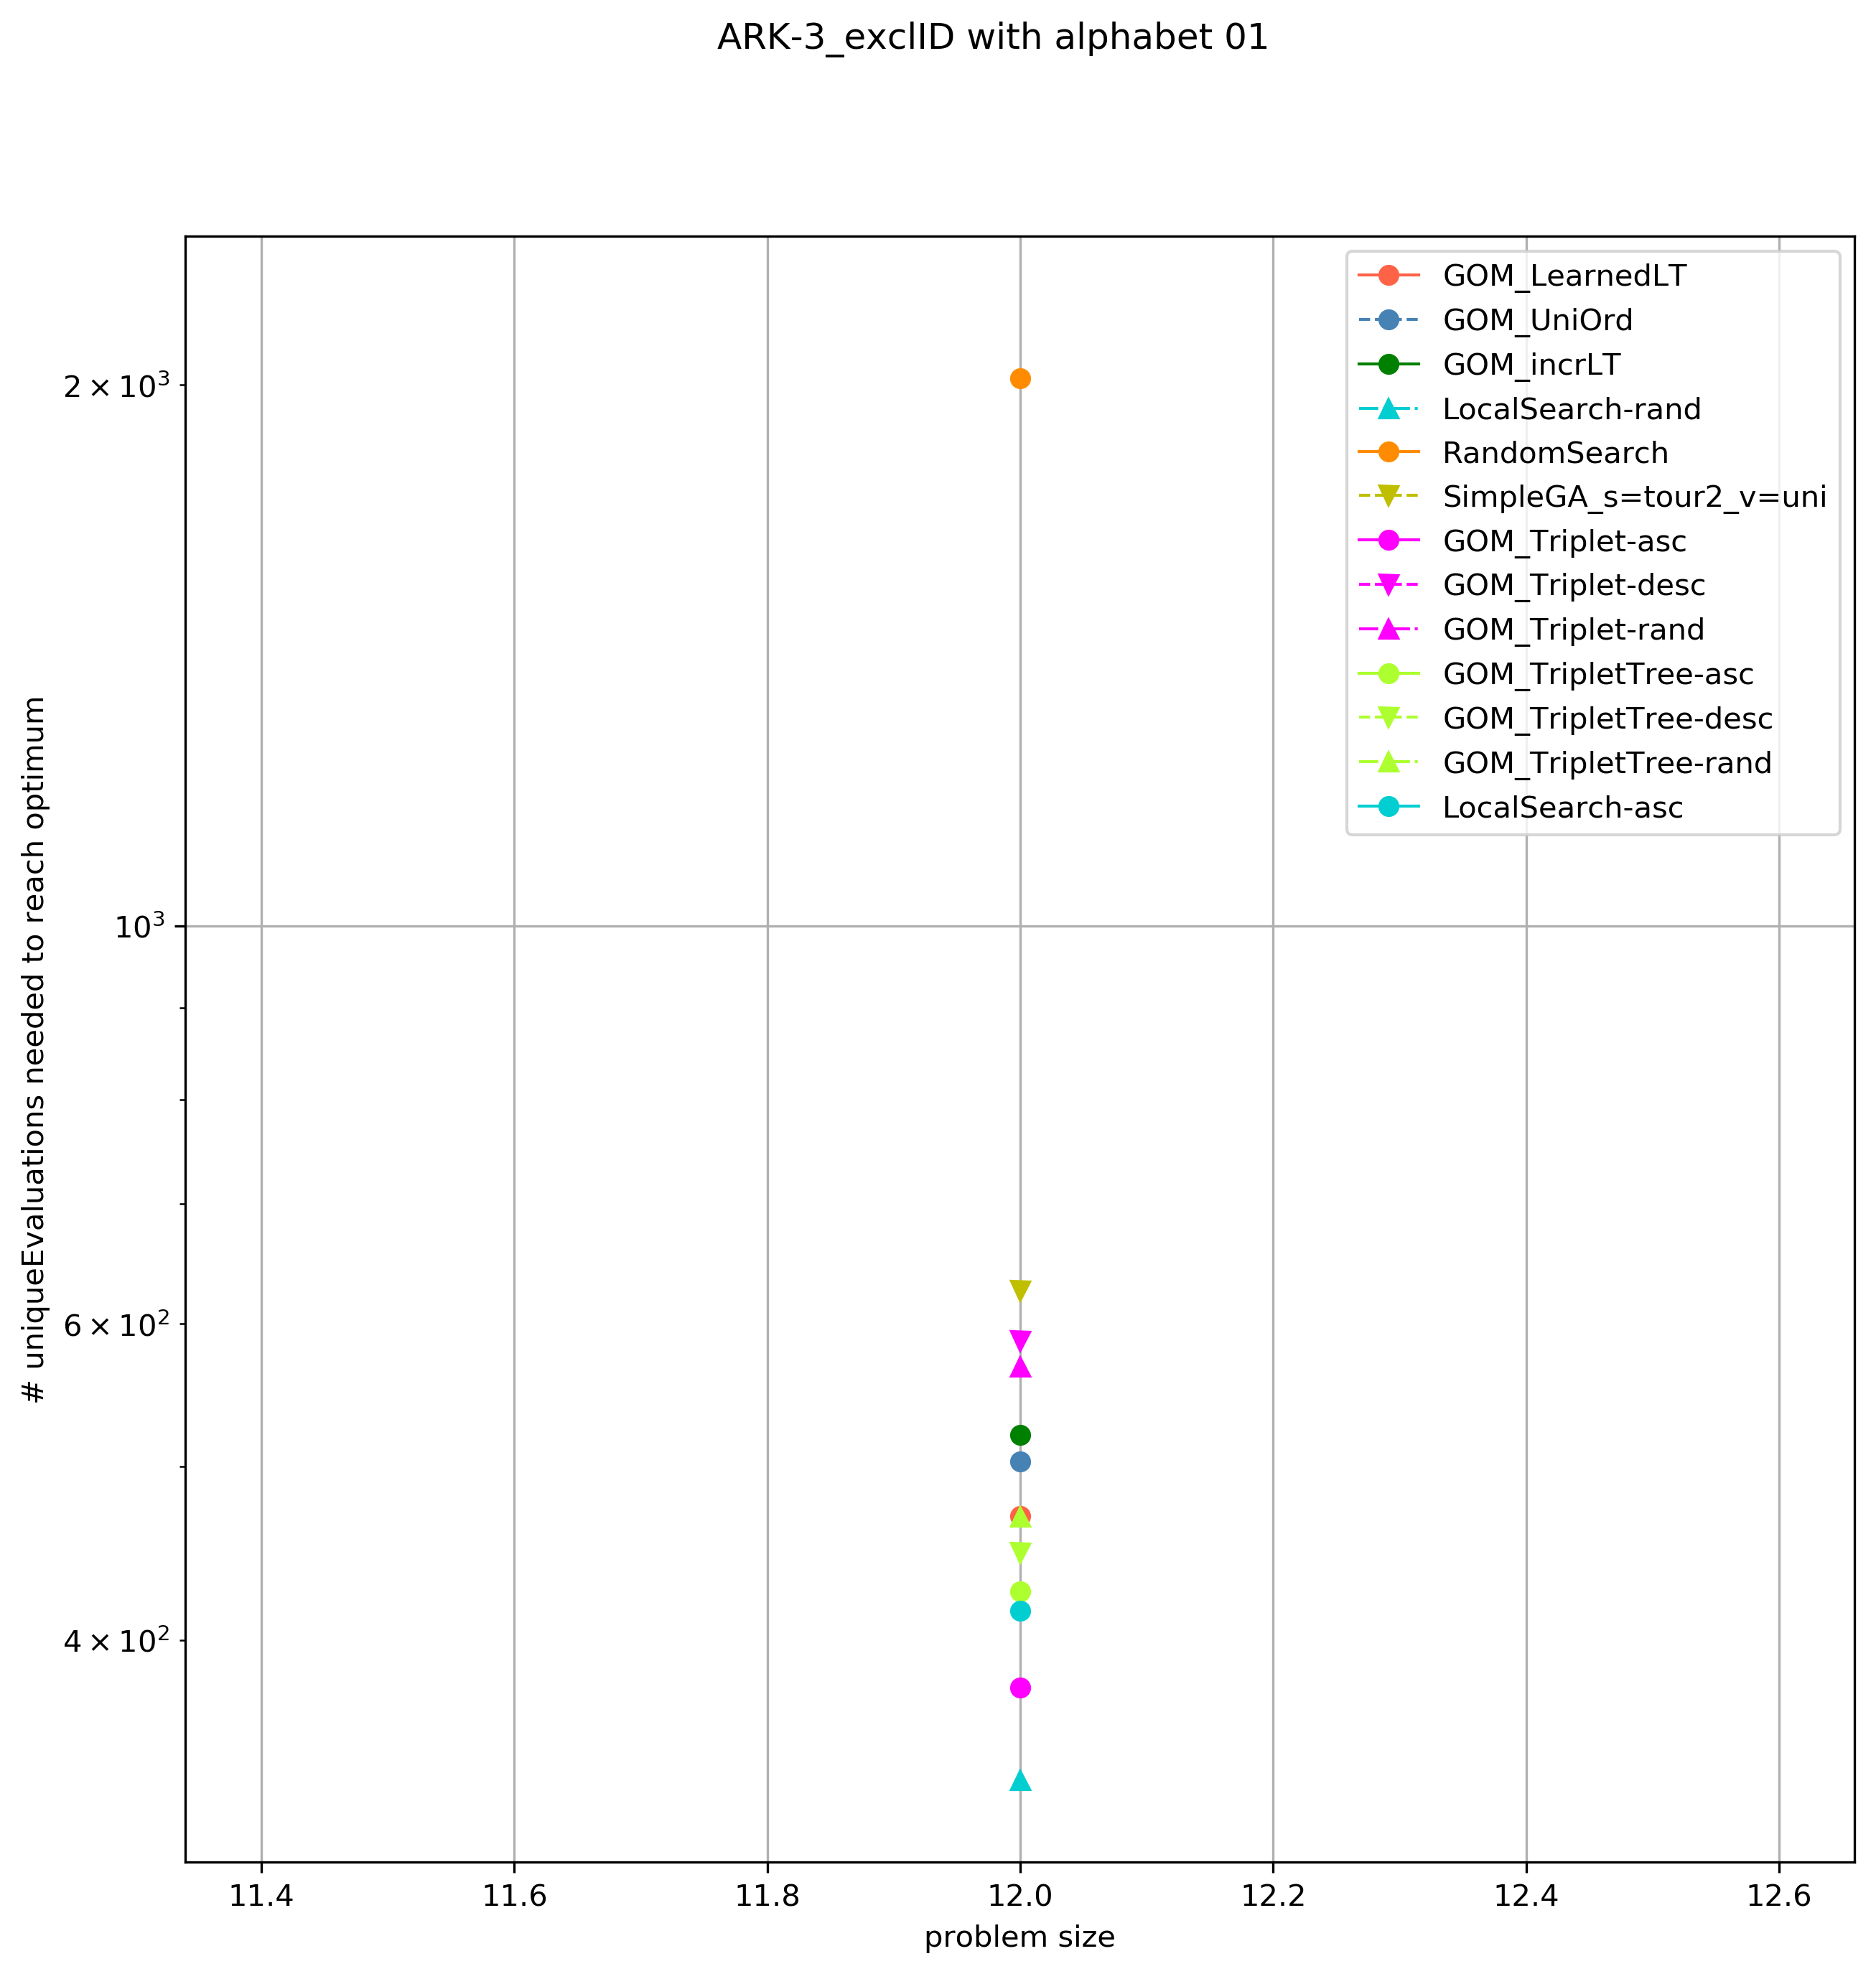

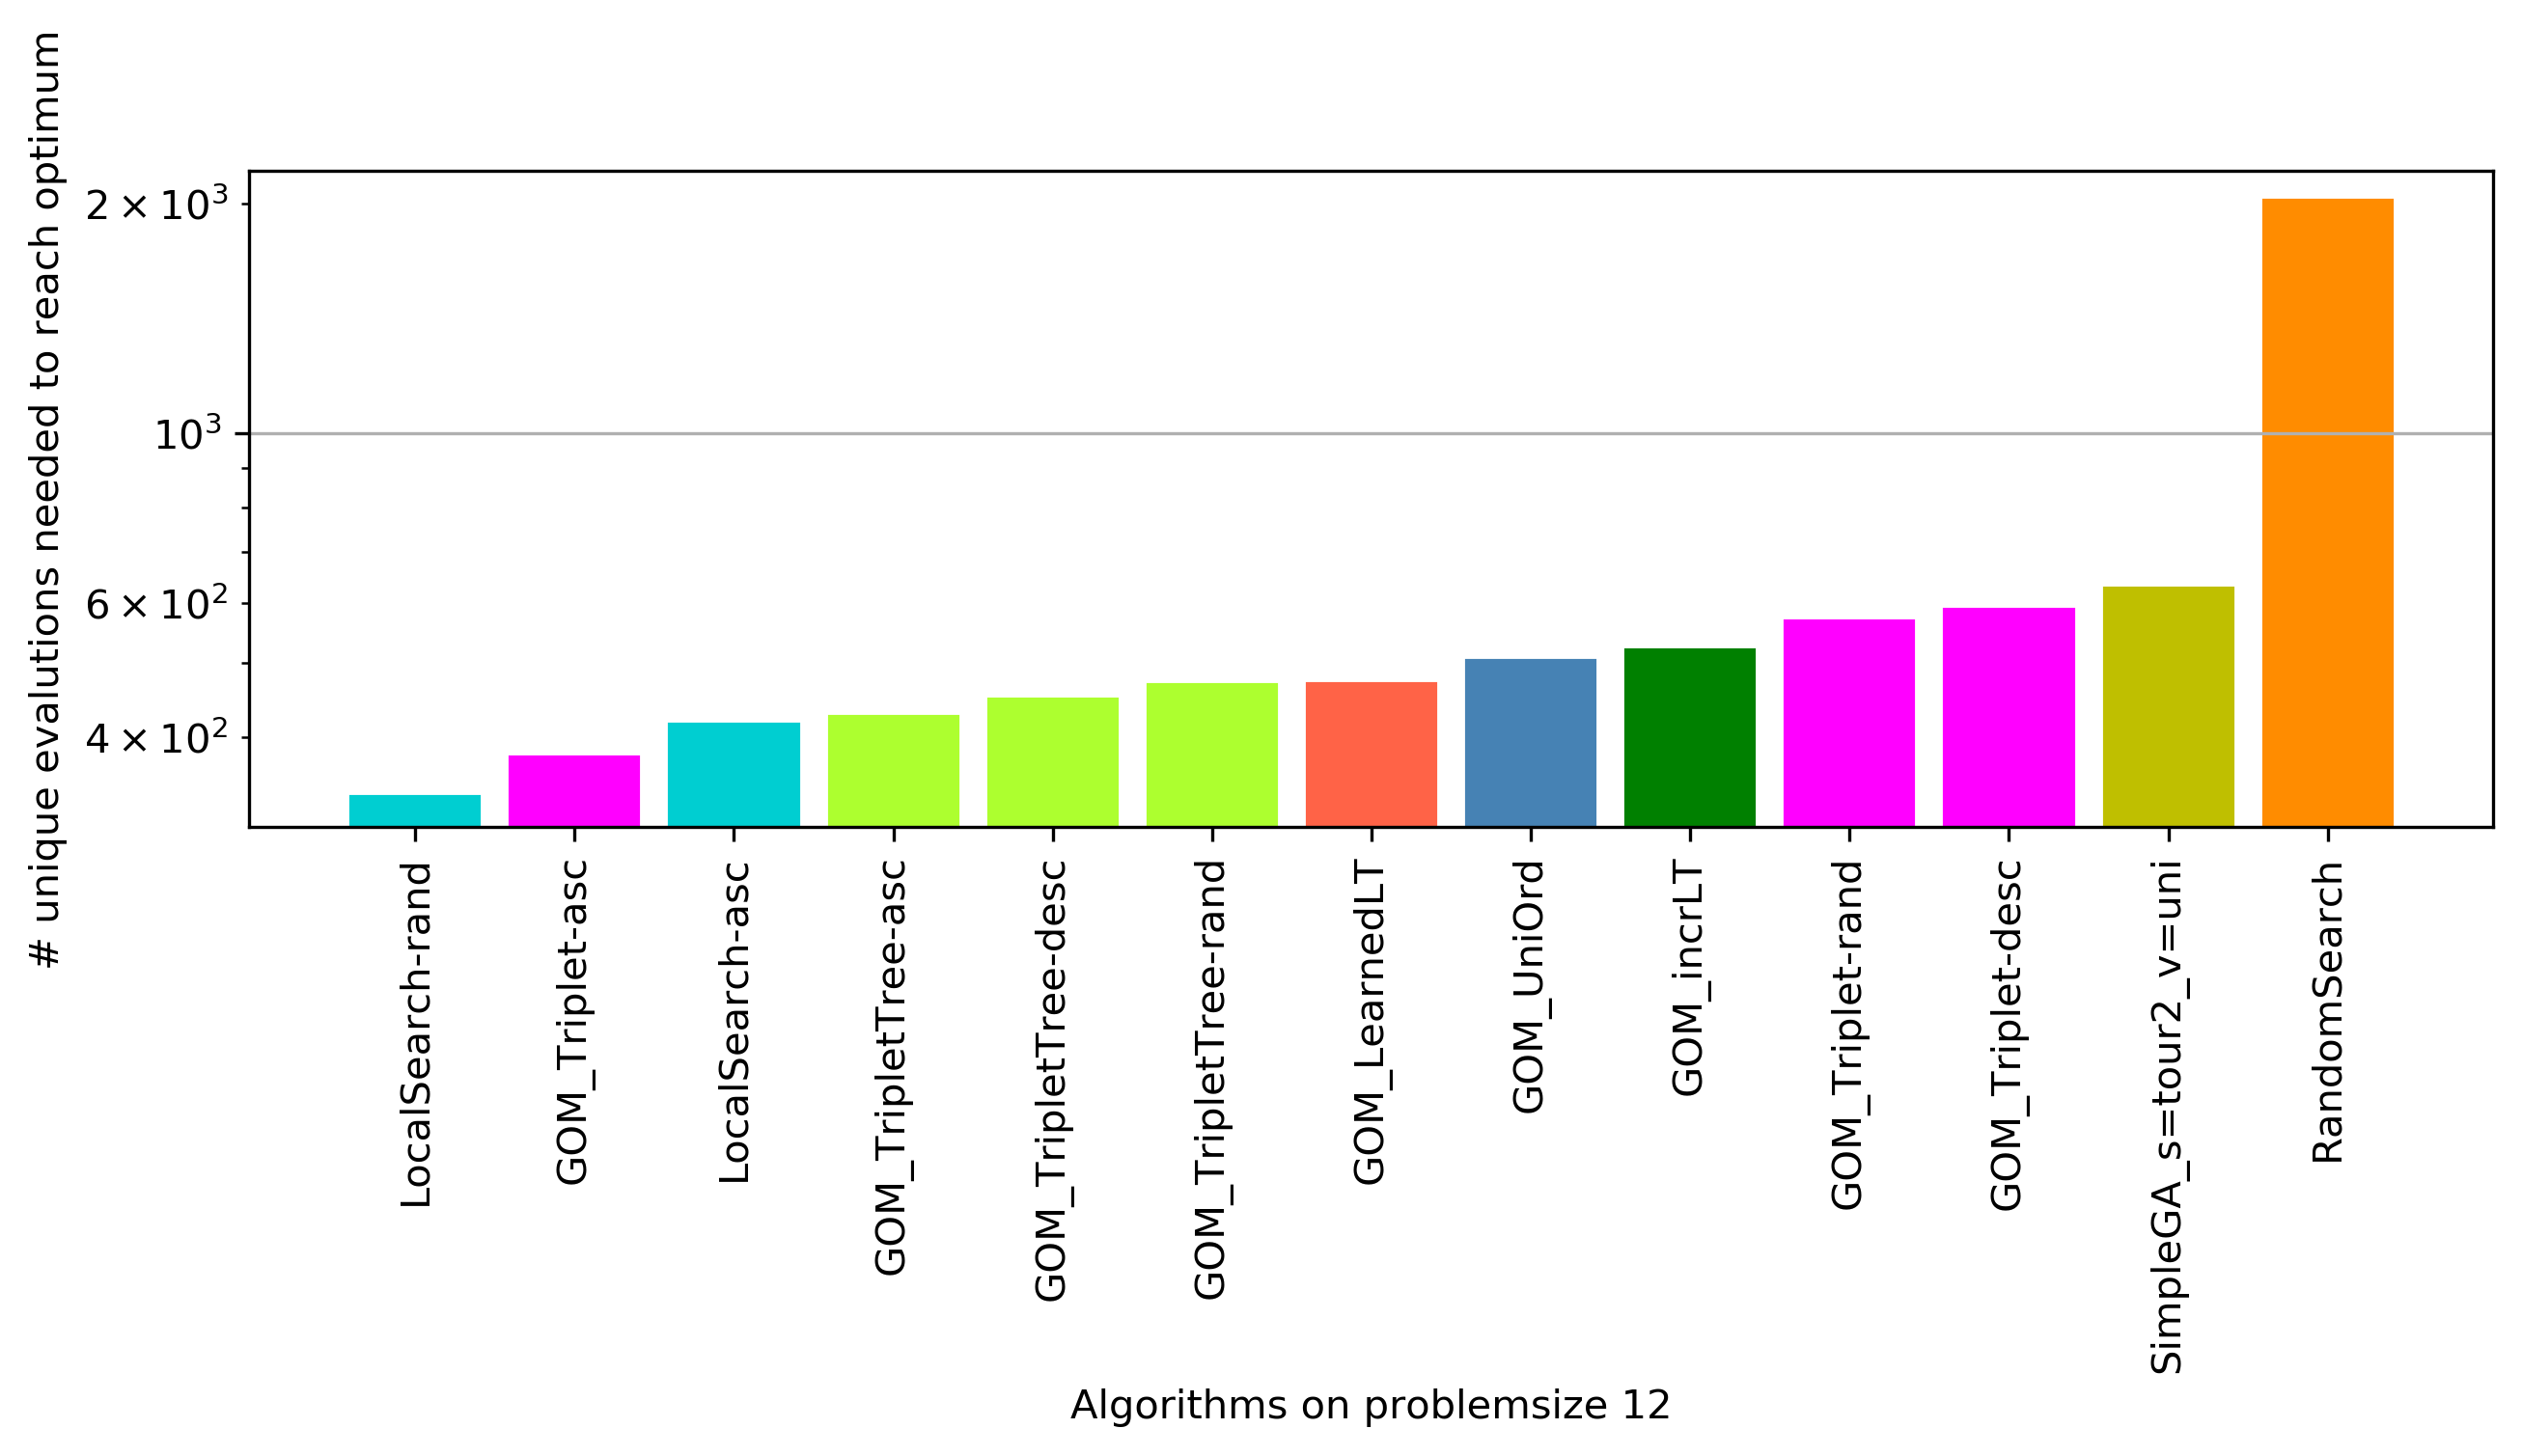

In [769]:
scalabilityPlot(["01"], 12, 12, 
                "../data/exp9/data_scaling_",
                "/data_combined.json", adaptedMinY=True,
               dontDisplayThese=["GOM_incrLTReversed", "GOM_incrLTReversed-Uni", "GOM_incrLTReversed-UniOrd",
                                 "SimpleGA_s=tour2_v=op", "GOM_UniOrdReversed", "GOM_incrLT-UniOrd",
                                "GOM_UniUnord", "LocalSearch-desc"])

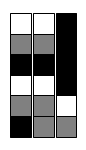

In [94]:
genotypes = [[0,1,2,0,1,2], [1,1,2,0,1,2], [1,2,0,0,0,0]]
genotypeDict = {
    0: "black",
    1: "grey",
    2: "white"
}

def drawGenotypes(genotypes, dictionary, figuresize=10):
    size = 1
    xOffset = 0.1 * size

    fig, ax = plt.subplots(figsize=(figuresize, figuresize))

#     ax = plt.gca()
    ax.patch.set_facecolor('white')
    ax.set_aspect('equal', 'box')

    for x, genotype in enumerate(genotypes):
        for y, gene in enumerate(genotype):
            rect = plt.Rectangle([x * size - size/2 + (x-1) * xOffset, y * size - size/2], size, size, facecolor=genotypeDict[gene], edgecolor="black")
            ax.add_patch(rect)

    ax.autoscale_view()
    plt.axis('off')
    plt.show()

drawGenotypes(genotypes, genotypeDict, figuresize=2.5)

# Experiment 10: ARK-4 - Scalability

averages of 100 repetitions


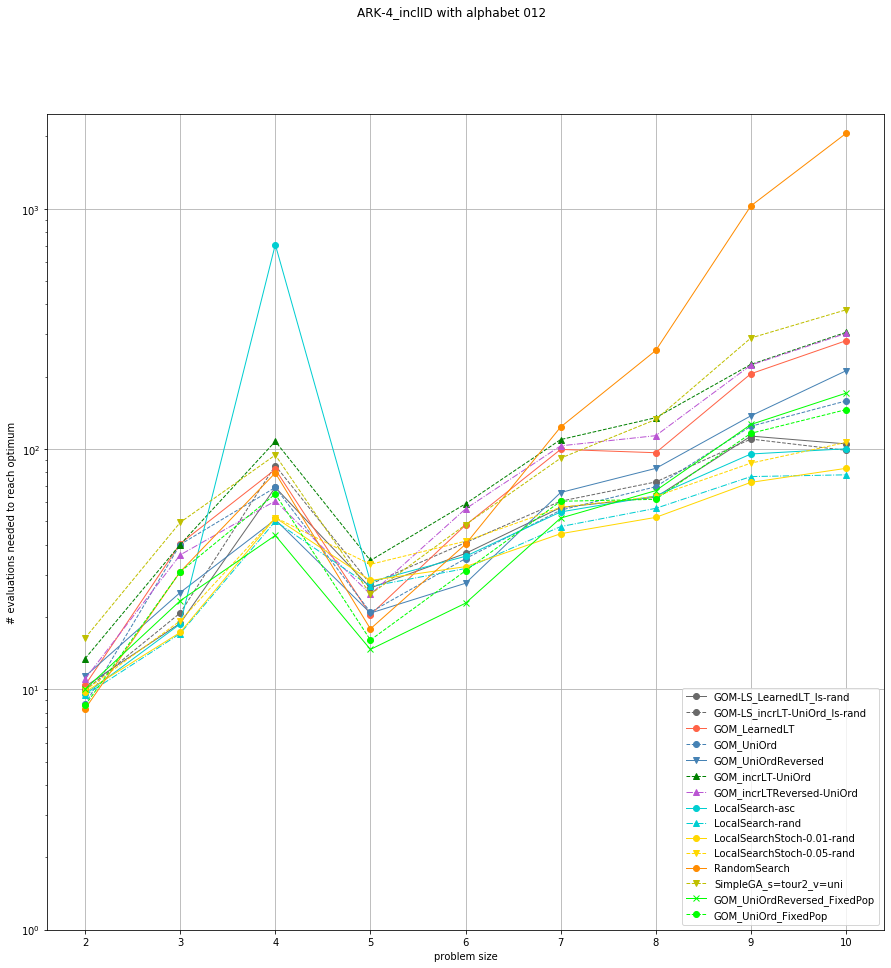

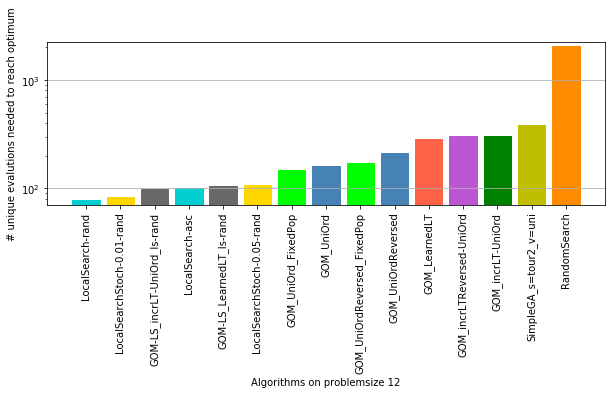

In [47]:
scalabilityPlot(["012"], 2, 13, 
                "../data/exp10/", 
                "/_combined.json",
                evaluationstype="evaluations",
                drawScalabilityBarPlot=True, 
#                 dontDisplayThese=["GOM_incrLTReversed", "GOM_Triplet-desc", "SimpleGA_s=tour2_v=op",
#                                  "GOM_UniOrdReversed", "GOM_UniUnord", "GOM_TripletTree-desc",
#                                  "GOM_TripletTree-rand", "GOM_incrLTReversed-Uni", "LocalSearchStoch-0.2-rand", 
#                                  "LocalSearchStoch-0.1-rand", "LocalSearchStoch-0.05-rand", 
#                                   "GOM-LS_incrLT-UniOrd_ls-rand"],
                dontDisplayThese=["SimpleGA_s=tour2_v=op", "GOM_incrLTReversed", "GOM_incrLTReversed-Uni",
                                 "GOM_incrLT", "LocalSearchStoch-0.2-rand", "LocalSearchStoch-0.1-rand", 
                                  "localSearchStoch-0.05-rand", "LocalSearch-desc", "GOM_UniUnord"
                                 ],
               figuresize=(15,15))

averages of 100 repetitions


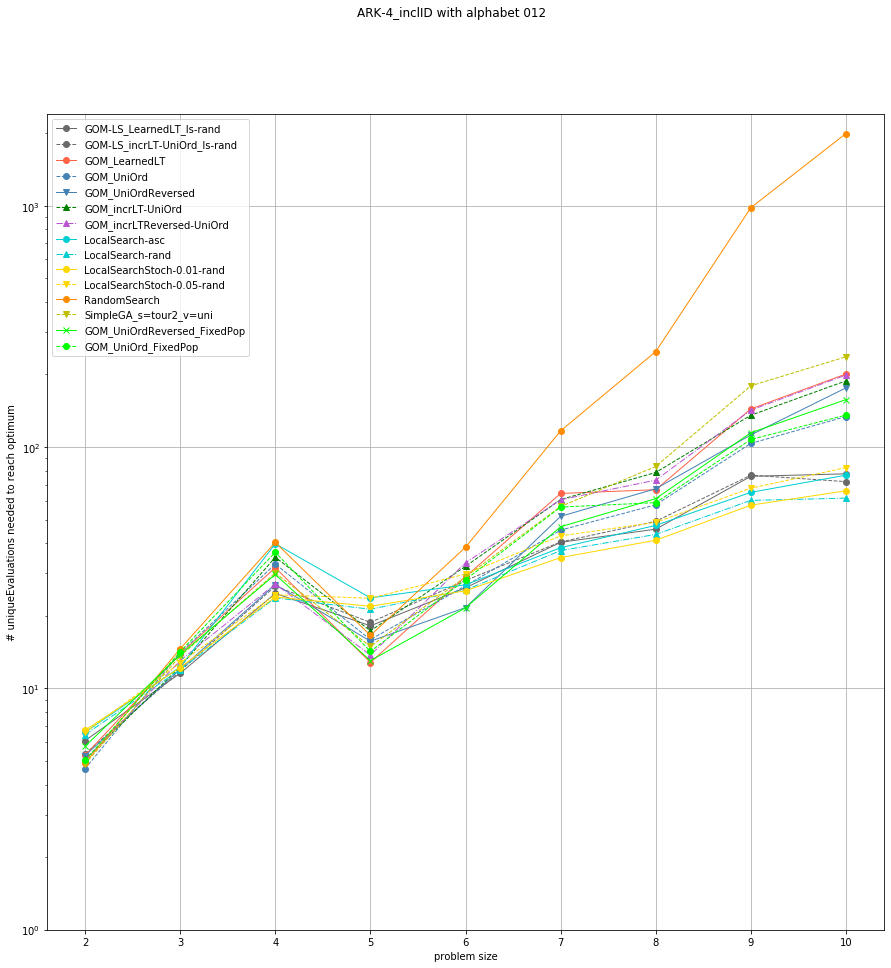

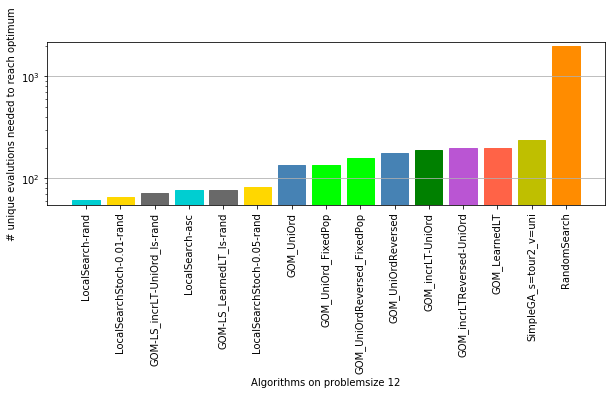

In [48]:
scalabilityPlot(["012"], 2, 13, 
                "../data/exp10/", 
                "/_combined.json",
                drawScalabilityBarPlot=True, 
#                 dontDisplayThese=["GOM_incrLTReversed", "GOM_Triplet-desc", "SimpleGA_s=tour2_v=op",
#                                  "GOM_UniOrdReversed", "GOM_UniUnord", "GOM_TripletTree-desc",
#                                  "GOM_TripletTree-rand", "GOM_incrLTReversed-Uni", "LocalSearchStoch-0.2-rand", 
#                                  "LocalSearchStoch-0.1-rand", "LocalSearchStoch-0.05-rand", 
#                                   "GOM-LS_incrLT-UniOrd_ls-rand"],
                dontDisplayThese=["SimpleGA_s=tour2_v=op", "GOM_incrLTReversed", "GOM_incrLTReversed-Uni",
                                 "GOM_incrLT", "LocalSearchStoch-0.2-rand", "LocalSearchStoch-0.1-rand", 
                                  "localSearchStoch-0.05-rand", "LocalSearch-desc", "GOM_UniUnord"
                                 ],
               figuresize=(15,15))

# Experiment 11: NK 3-bit blocks - Scalability

averages of 50 repetitions
averages of 50 repetitions
averages of 50 repetitions
averages of 50 repetitions


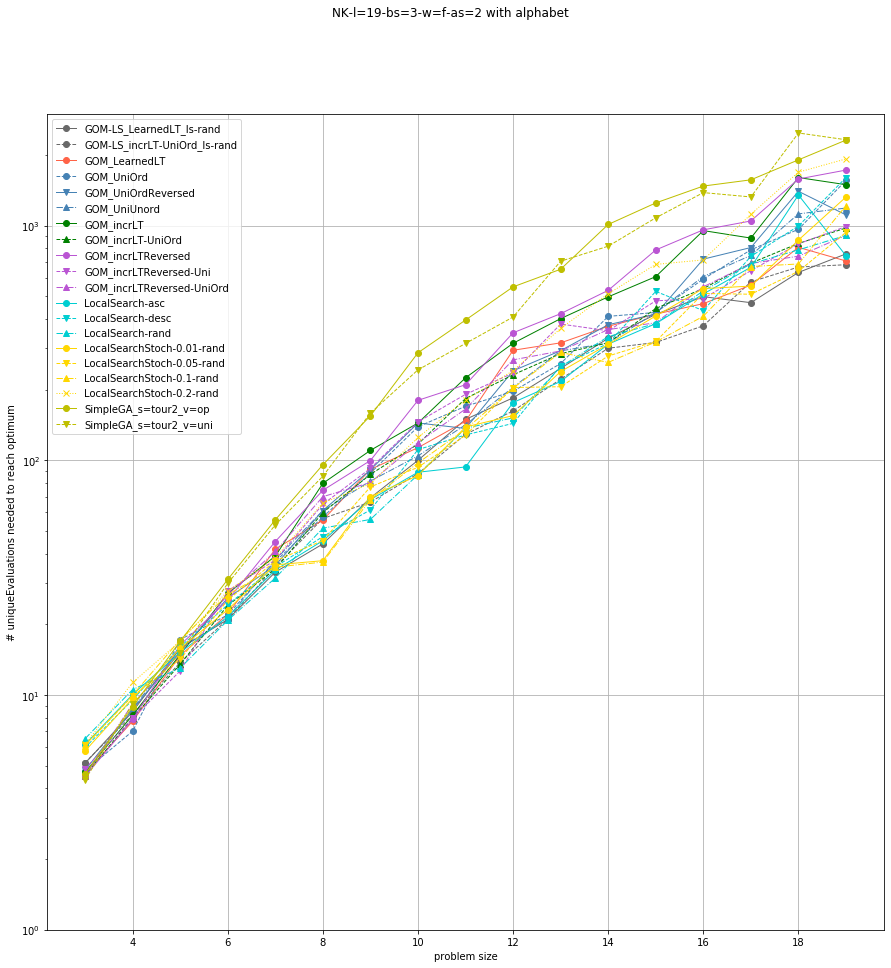

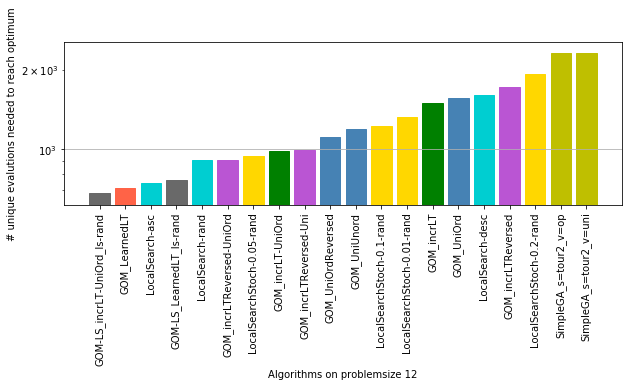

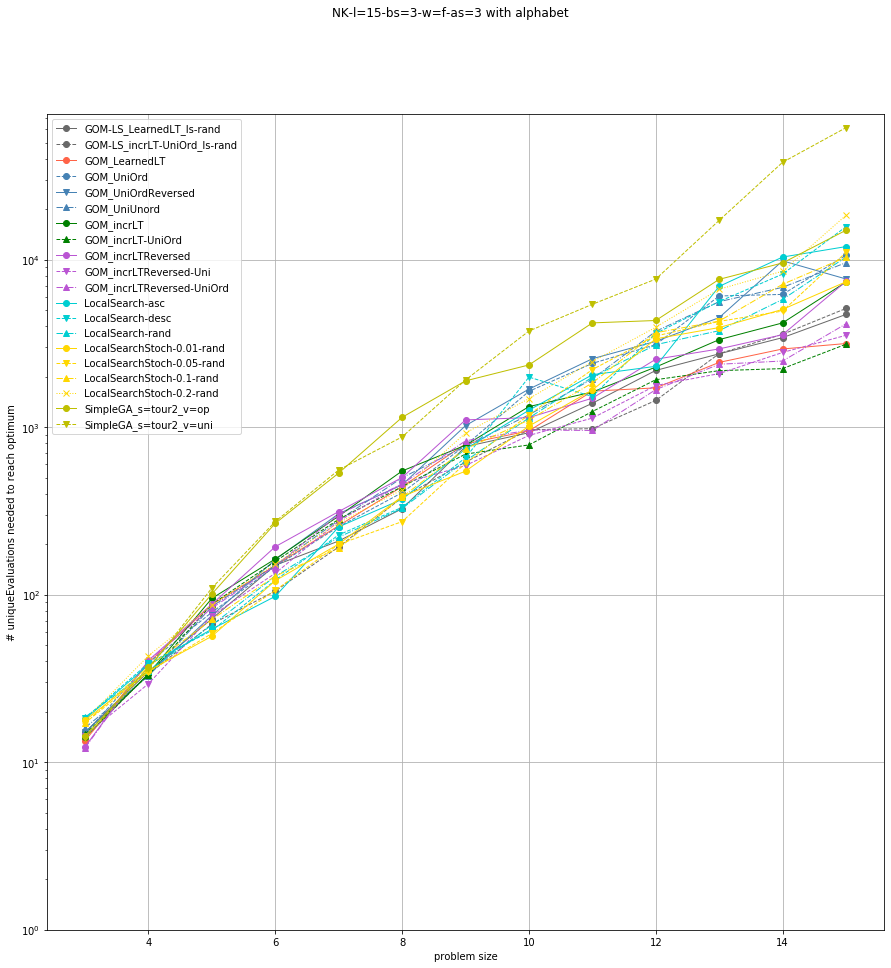

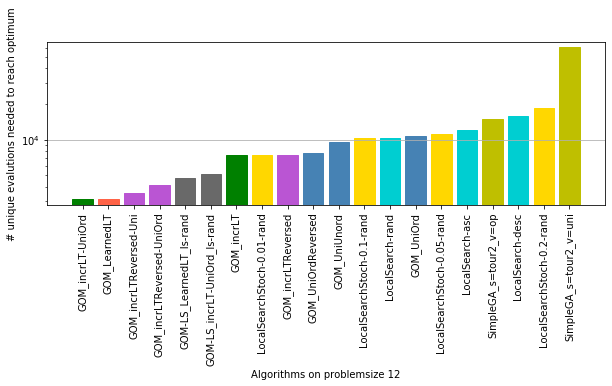

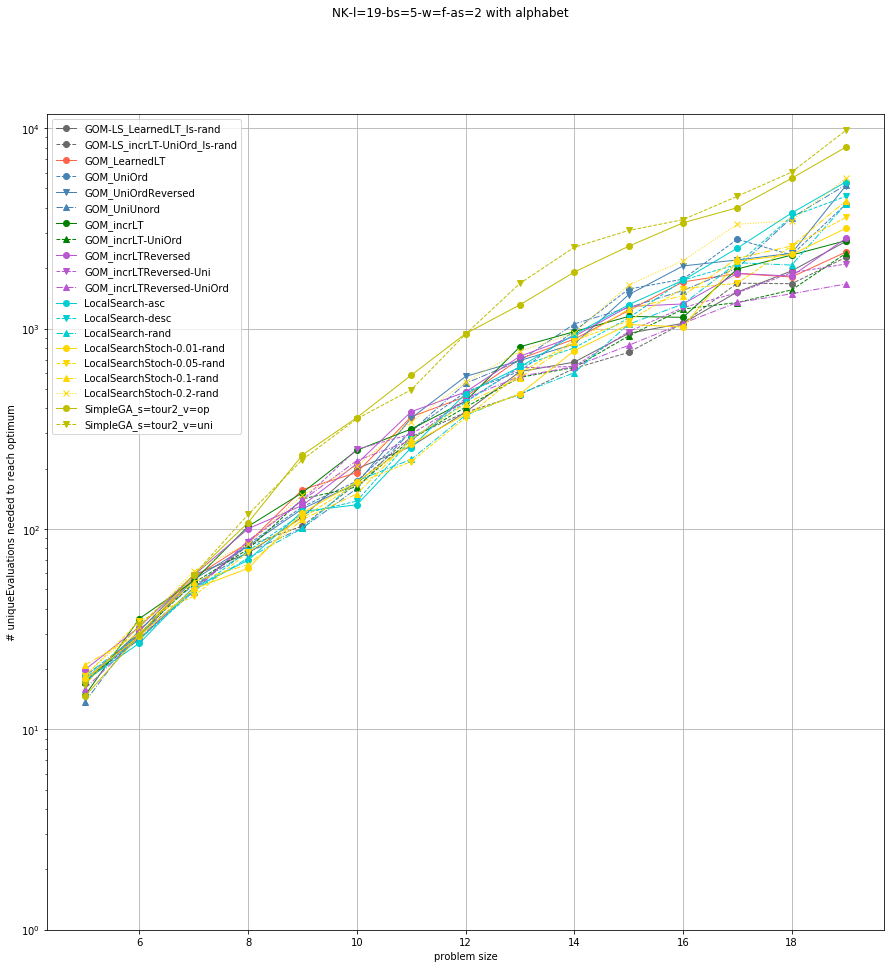

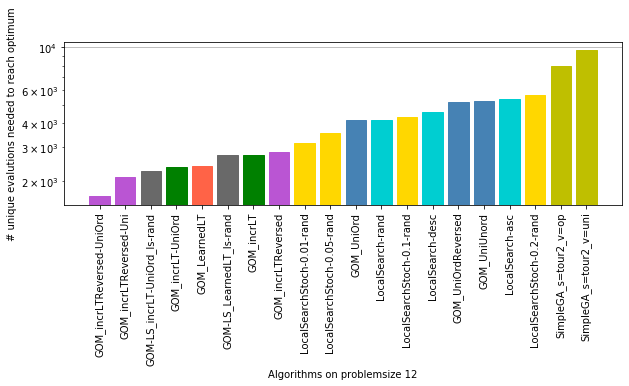

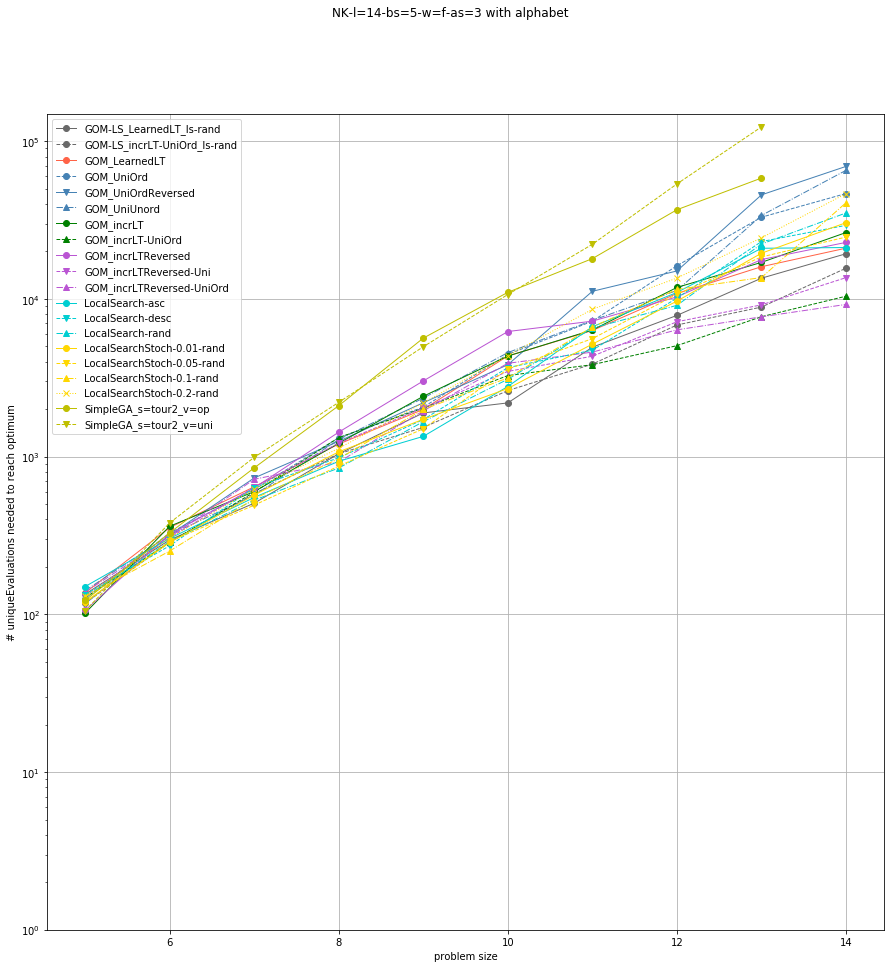

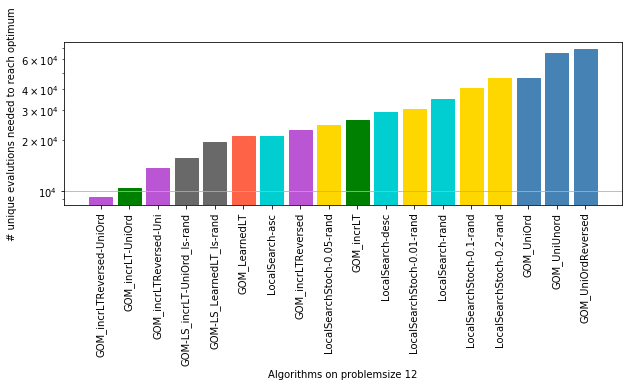

In [74]:
for pair in [("NK-3-01", 19), ("NK-3-012", 15), ("NK-5-01",19), ("NK-5-012",14)]:

    scalabilityPlot([""], 3, 20, 
                    ("../data/exp11/" + pair[0]), 
                    "/combined.json",
                    evaluationstype="uniqueEvaluations",
                    drawScalabilityBarPlot=True,
                   figuresize=(15,15),
                   barPlot=pair[1])

# Experiment 12: ARK-5 - Scalability

averages of 100 repetitions


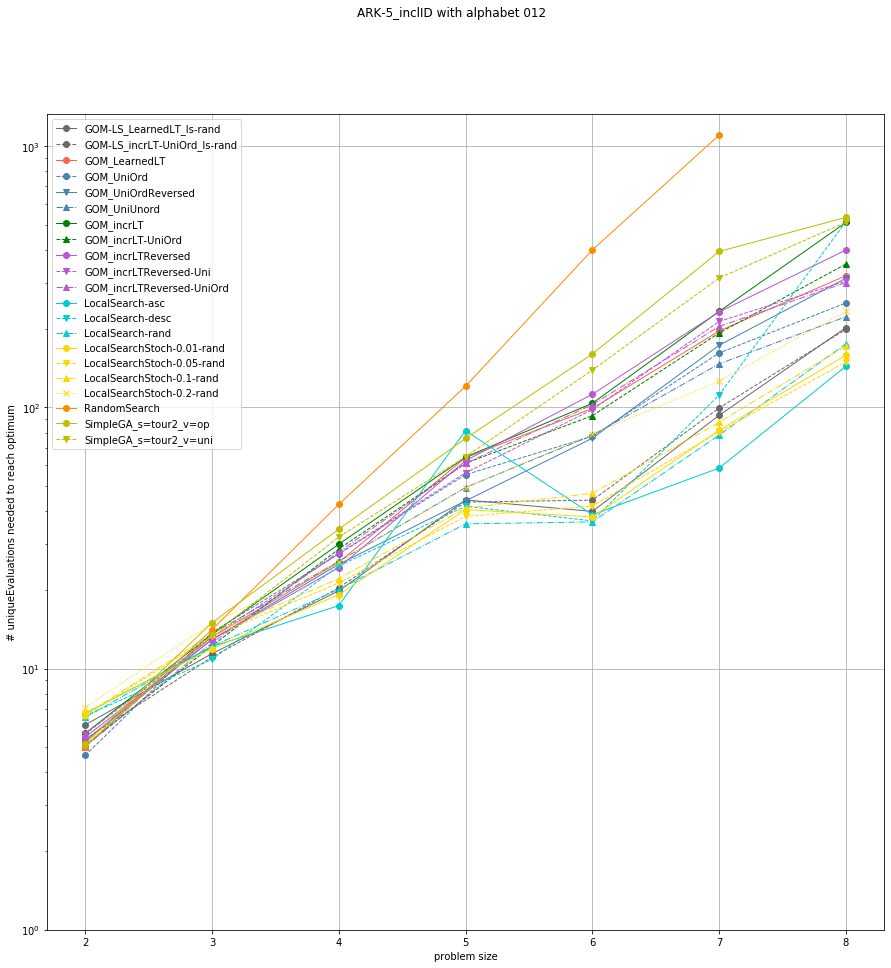

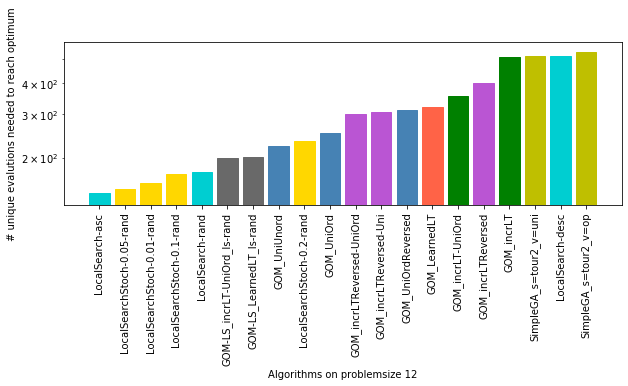

In [56]:
scalabilityPlot(["012"], 2, 8, 
                "../data/exp12/", 
                "/combined.json",
                evaluationstype="uniqueEvaluations",
                drawScalabilityBarPlot=True,
               figuresize=(15,15), barPlot=8)

# Experiment 13: ARK-6 Scalability (14-layered single one-shot NAS)

## More than one optimum

averages of 50 repetitions


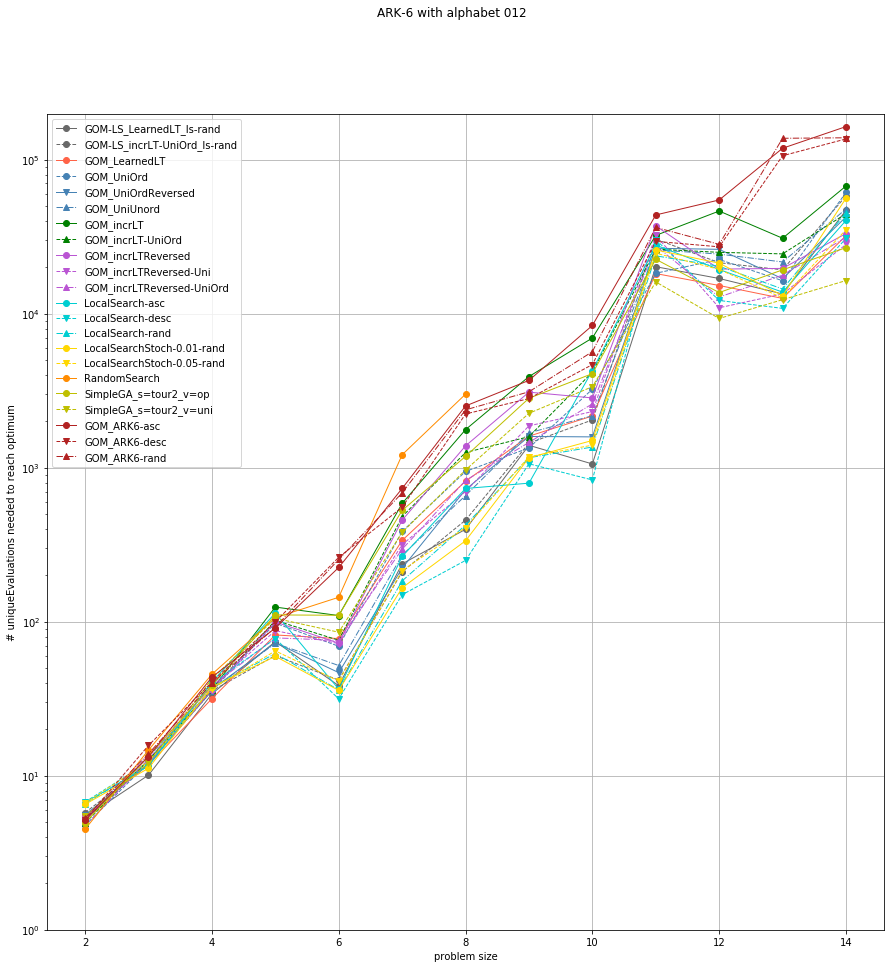

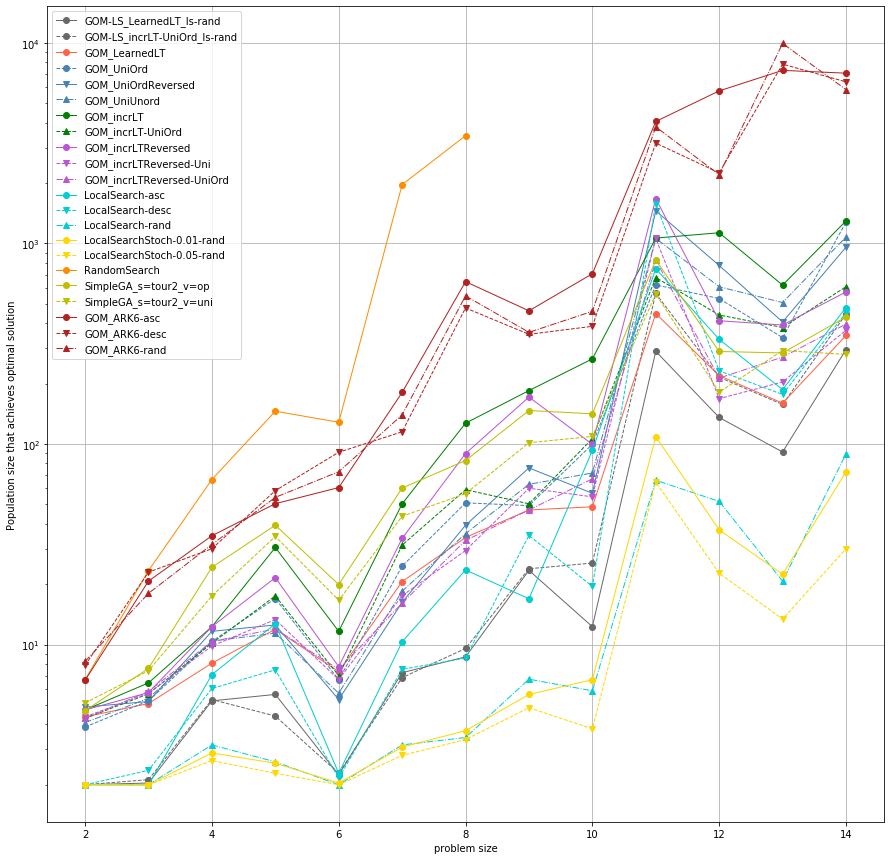

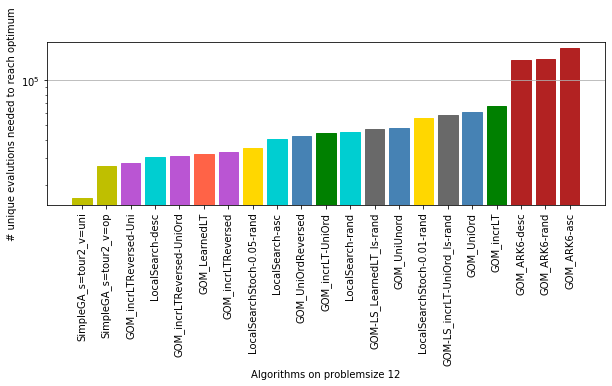

In [207]:
scalabilityPlot(["012"], 2, 14, 
                "../data/exp13/", 
                "/combined.json",
                evaluationstype="uniqueEvaluations",
                drawScalabilityBarPlot=True,
               figuresize=(15,15), barPlot=14, alsoPlotPopulationSize=True, popSizeKey="successfulGAPopulation")

##### Population size analysis

averages of 50 repetitions
averages of 50 repetitions


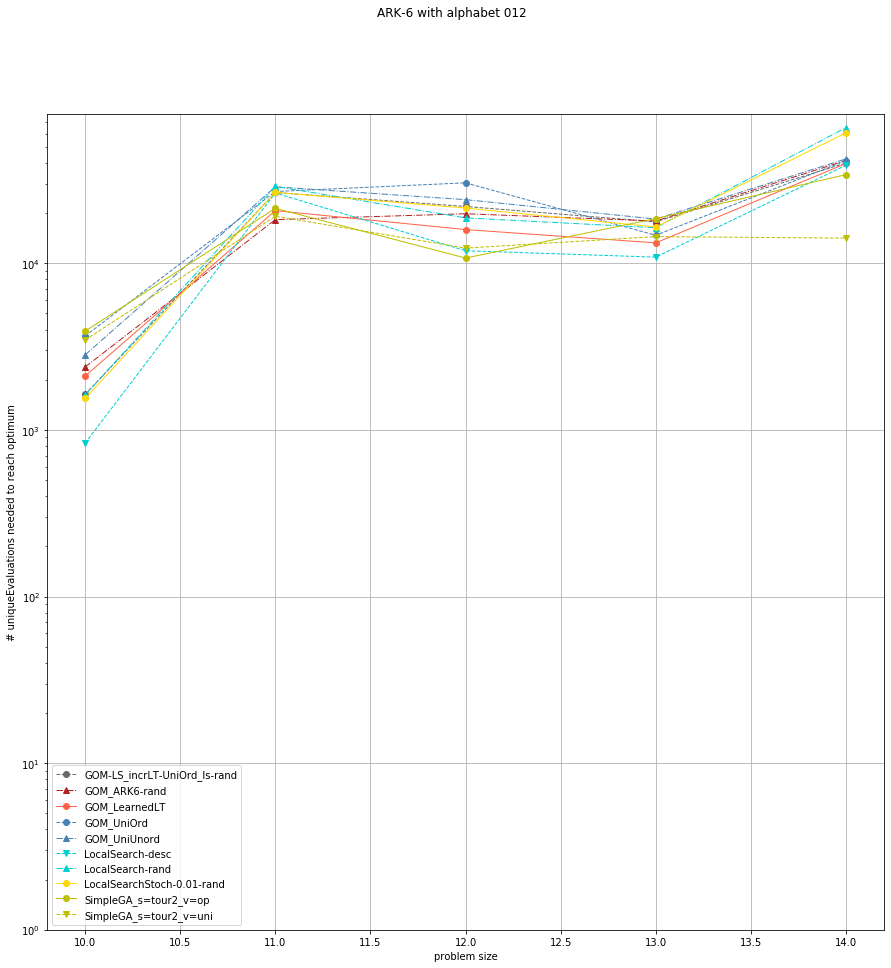

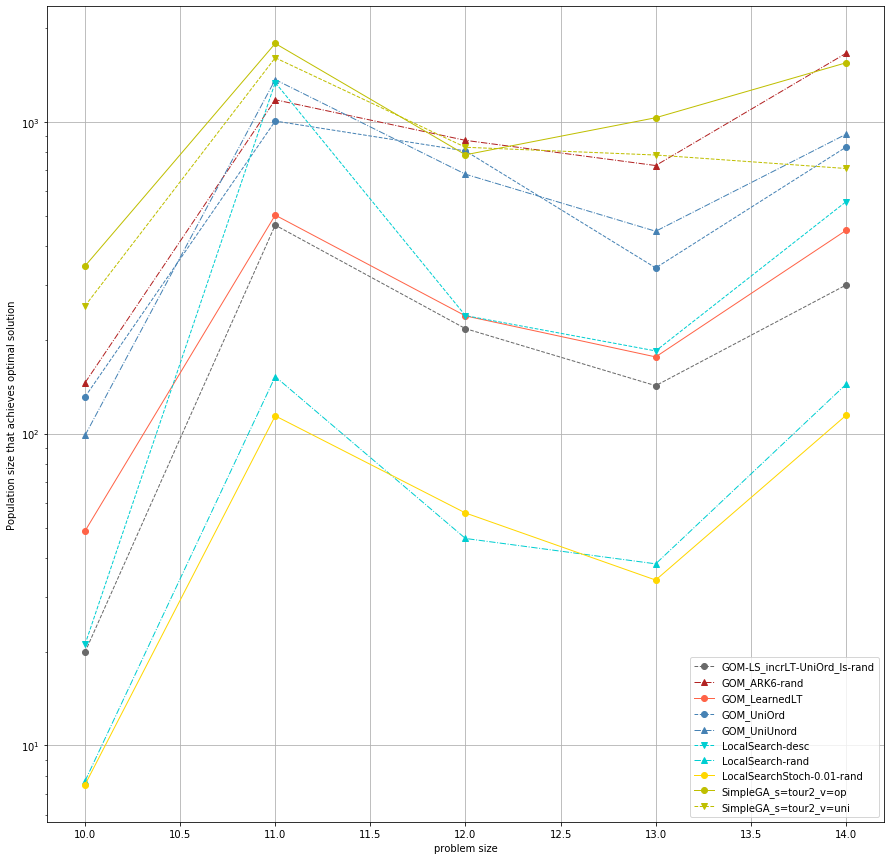

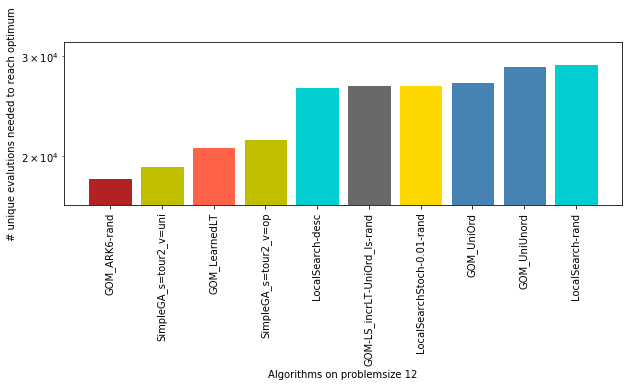

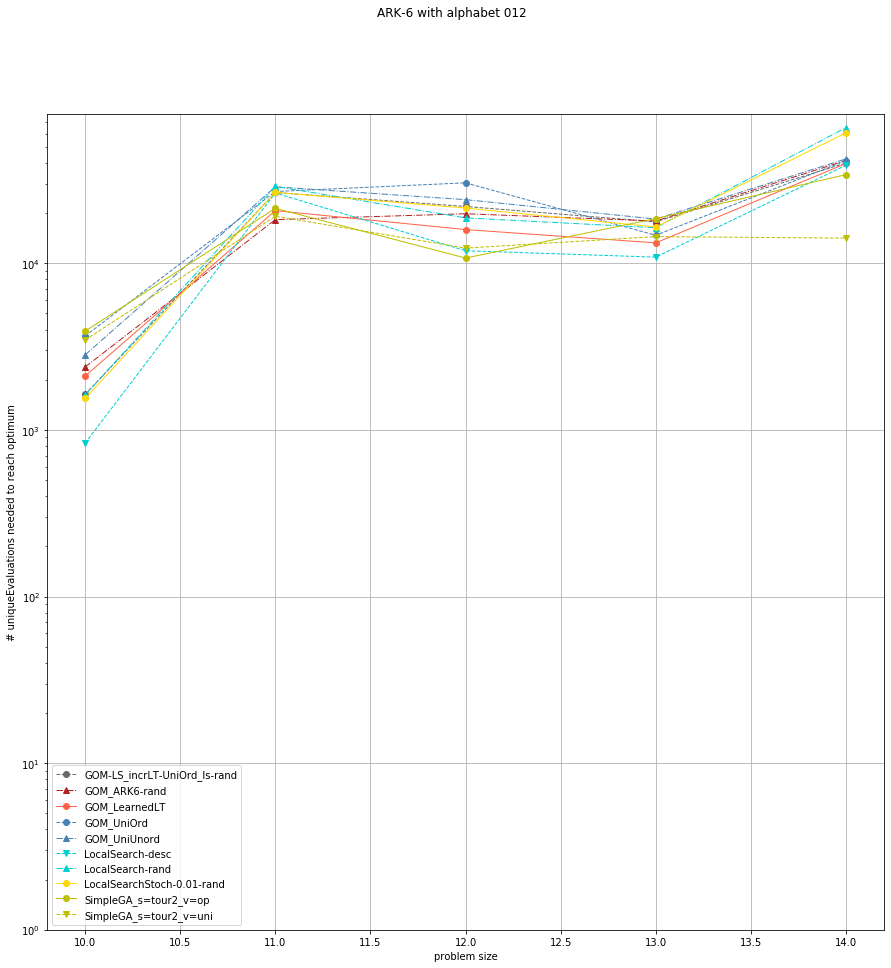

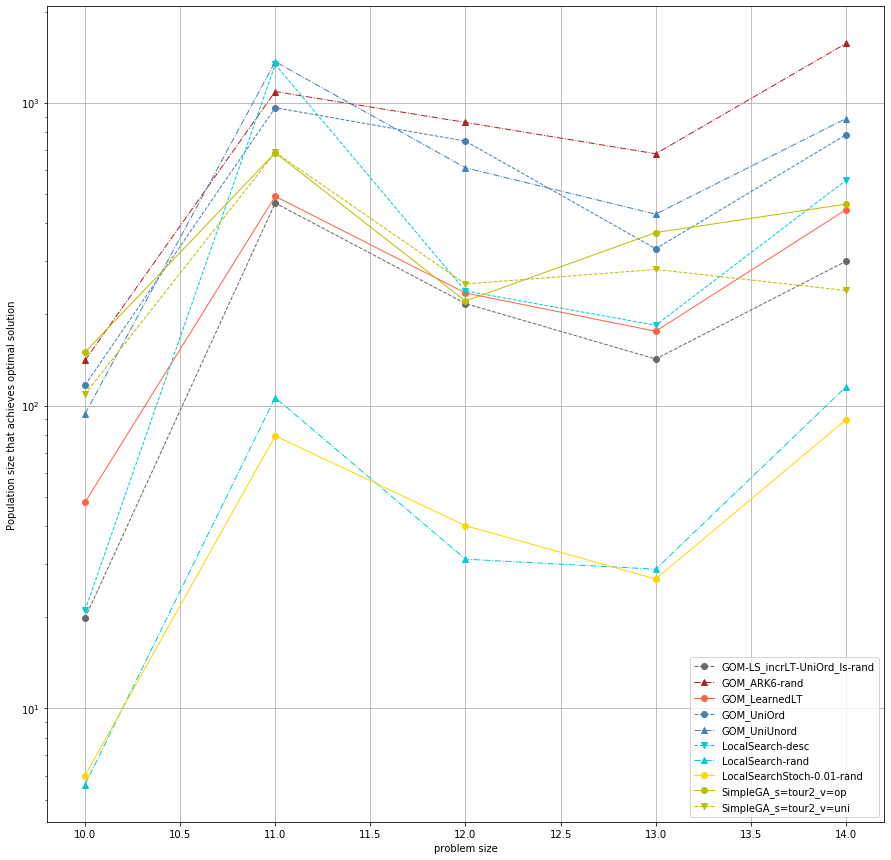

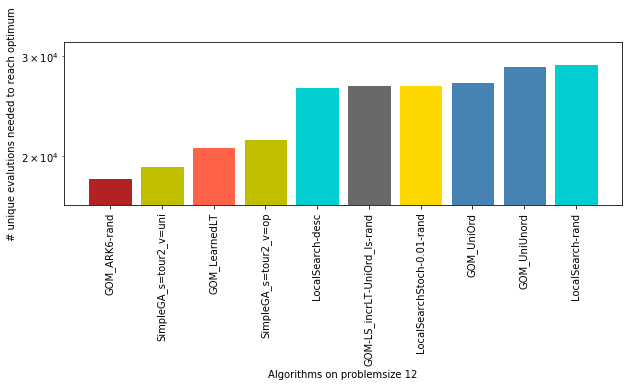

In [177]:
scalabilityPlot(["012"], 10, 14, 
                "../data/exp13/", 
                "/popsize/combined.json",
                evaluationstype="uniqueEvaluations",
                drawScalabilityBarPlot=True,
               figuresize=(15,15), barPlot=11, alsoPlotPopulationSize=True,
               popSizeKey="popsizereached")

scalabilityPlot(["012"], 10, 14, 
                "../data/exp13/", 
                "/popsize/combined.json",
                evaluationstype="uniqueEvaluations",
                drawScalabilityBarPlot=True,
               figuresize=(15,15), barPlot=11, alsoPlotPopulationSize=True,
               popSizeKey="successfulGAPopulation")

## Experiments with only ONE optimum

averages of 50 repetitions


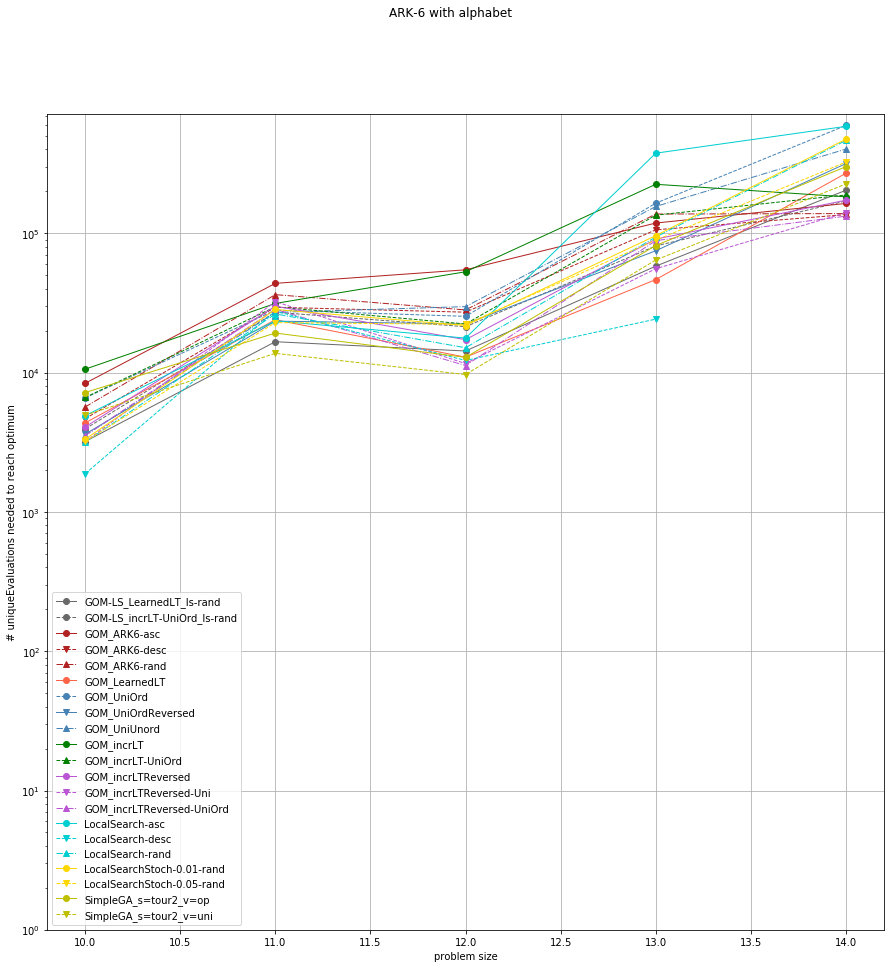

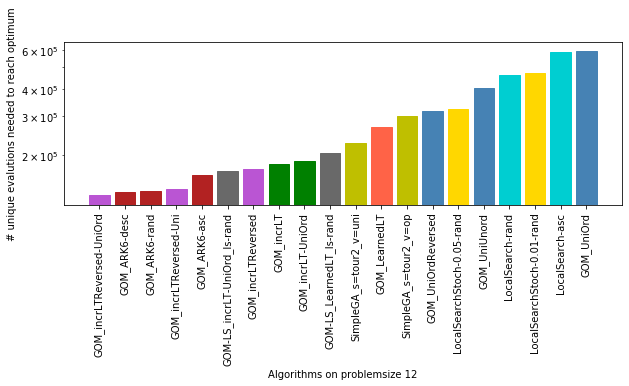

In [198]:
scalabilityPlot([""], 10, 14, 
                "../data/exp13/012/10-14", 
                "/combined.json",
                evaluationstype="uniqueEvaluations",
                drawScalabilityBarPlot=True,
               figuresize=(15,15), barPlot=14, popSizeKey="successfulGAPopulation")

# Experiment 13b: ARK-6 Convergence

### Multiple optima

averages of 50 repetitions


/Users/tomdenottelander/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/tomdenottelander/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


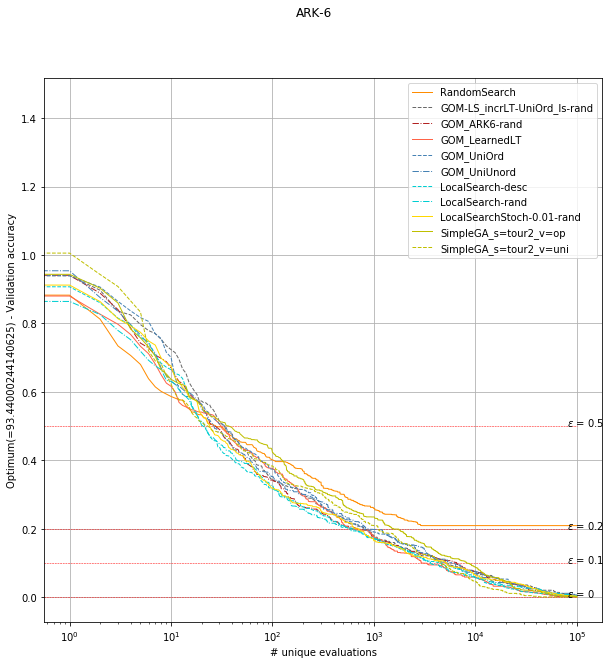

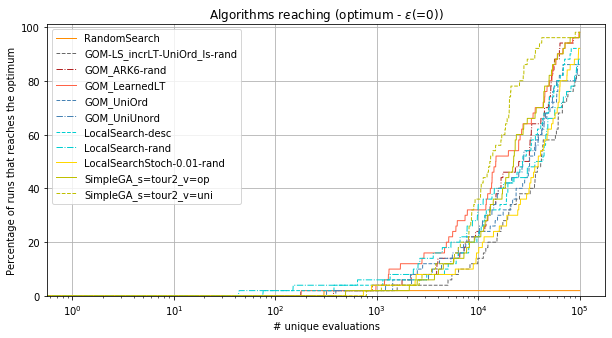

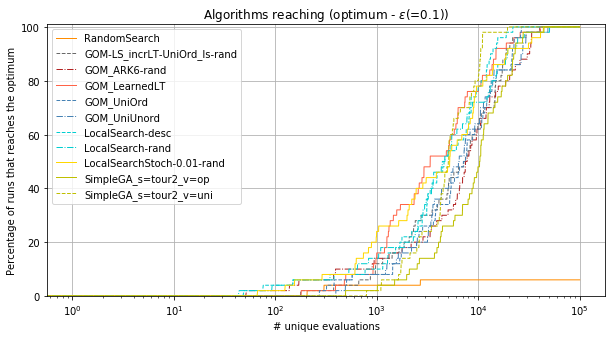

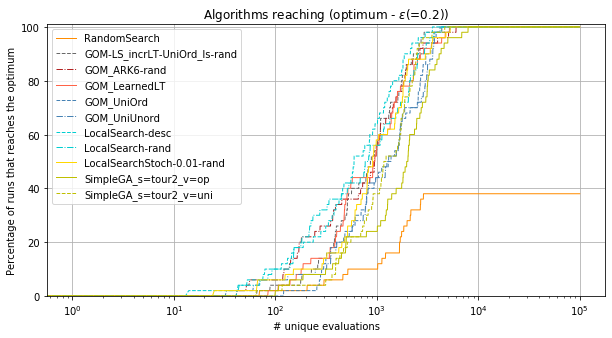

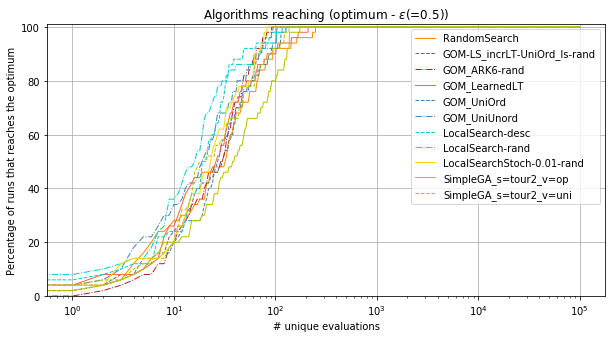

In [182]:
convergencePlot("../data/exp13/b/multiple_optima/data_conv_combined.json", 
                numEvaluations=100000,
               evaluationsType='unique', epsilon=[0, 0.1, 0.2, 0.5],
               xlog=True)

averages of 50 repetitions


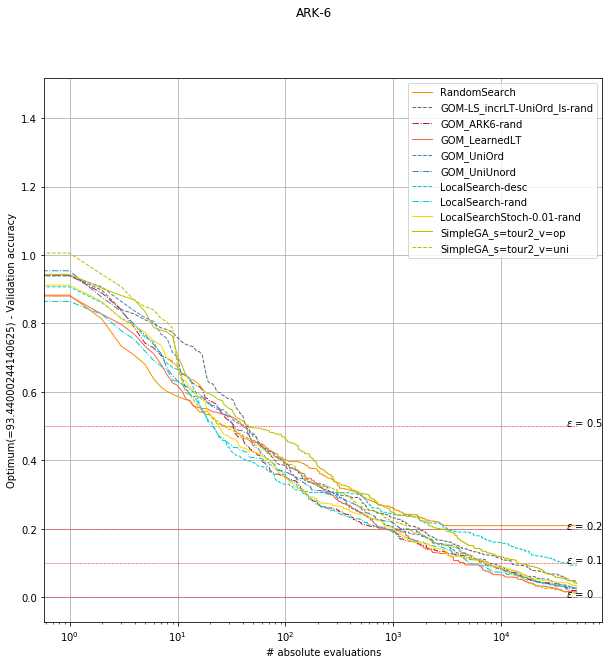

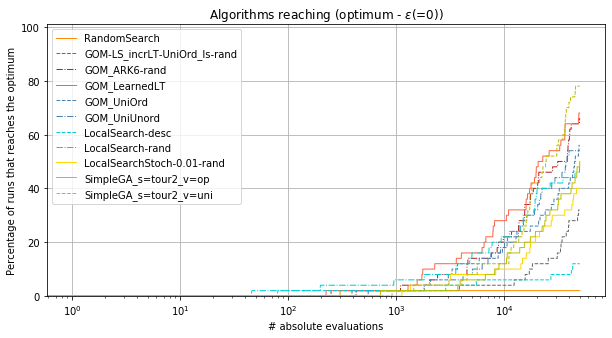

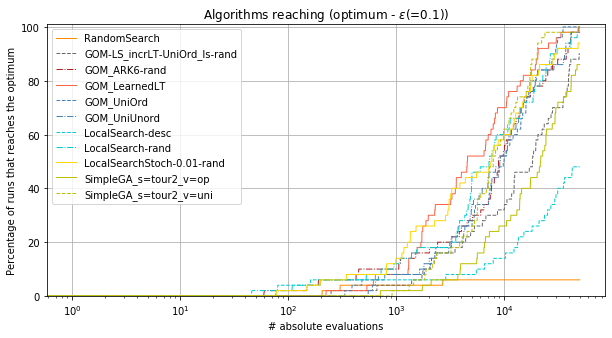

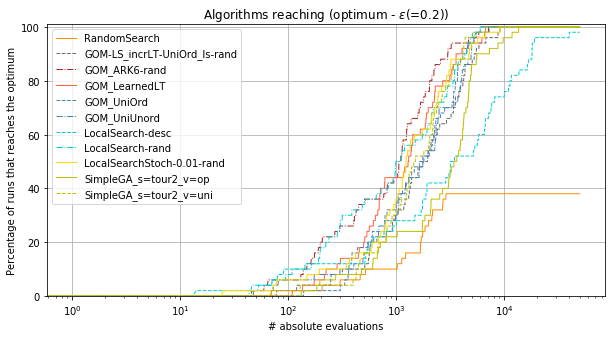

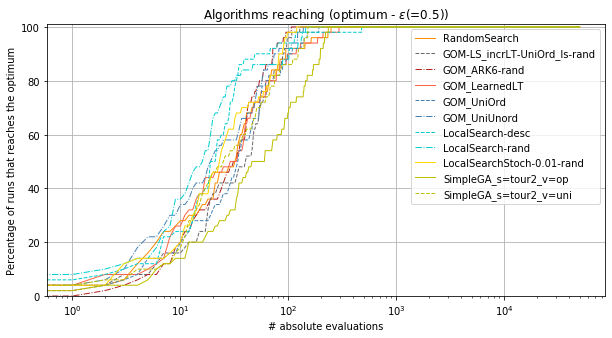

In [208]:
convergencePlot("../data/exp13/b/multiple_optima/data_conv_combined.json", 
                numEvaluations=50000,
               evaluationsType='absolute', epsilon=[0, 0.1, 0.2, 0.5],
               xlog=True)

### One optimum

averages of 50 repetitions


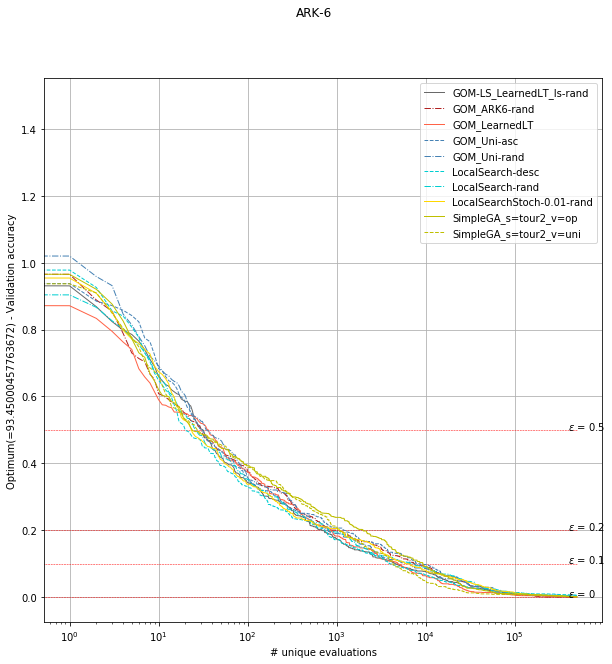

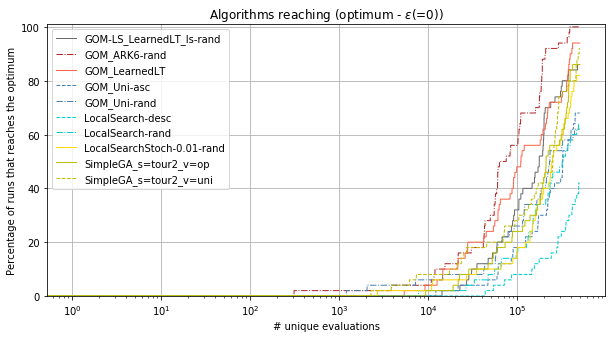

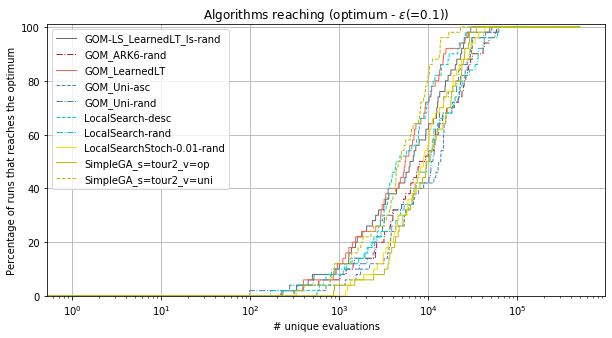

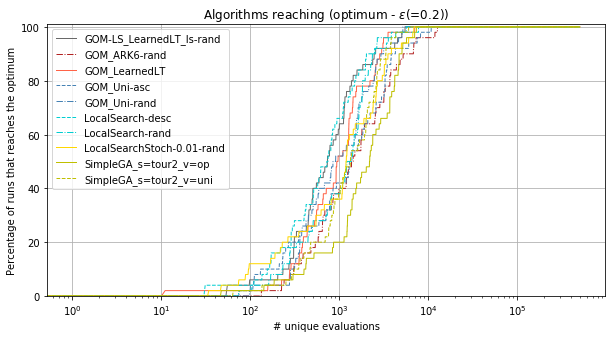

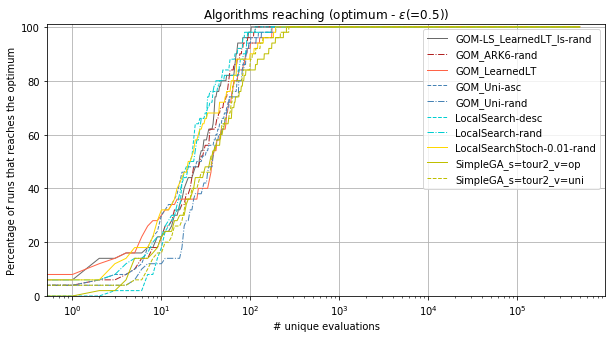

In [199]:
convergencePlot("../data/exp13/b/one_optimum/data_conv.json", 
                numEvaluations=500000,
               evaluationsType='unique', epsilon=[0, 0.1, 0.2, 0.5], 
                xlog=True)

# Experiment 14: ARK-7 Scalability (14-layered single one-shot NAS)

## Only ONE optimum

averages of 50 repetitions


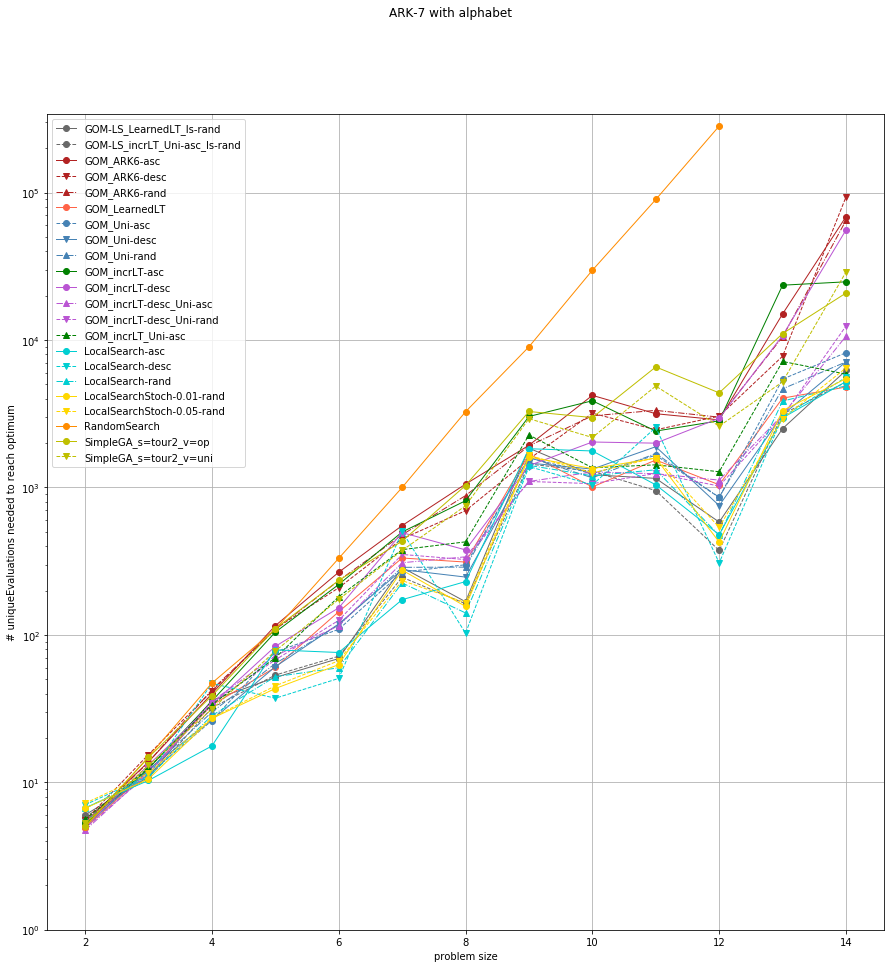

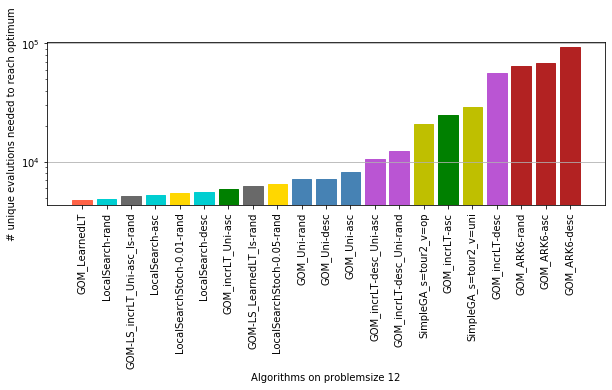

In [206]:
scalabilityPlot([""], 2, 14, 
                "../data/exp14/", 
                "combined.json",
                evaluationstype="uniqueEvaluations",
                drawScalabilityBarPlot=True,
               figuresize=(15,15), barPlot=14, popSizeKey="successfulGAPopulation")